# DATA PREPARATION AND PREPROCESSING

In [156]:
#importing the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading the dataset
df = pd.read_csv("Covid Data.csv")

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [5]:
(df.duplicated().sum()/df.shape[0])*100

77.44310135183463

In [6]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [7]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [8]:
df_null = df.copy()
for i in [97, 98, 99]:
    df_null.replace(i, np.nan, inplace = True)

In [9]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

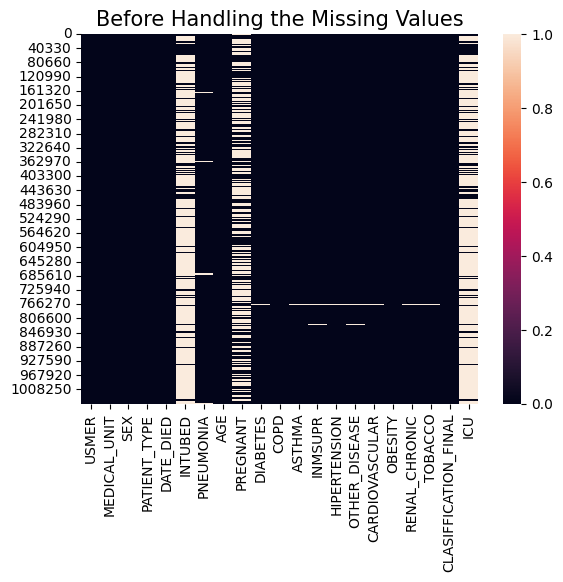

In [10]:
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [11]:
df['DATE_DIED'][df[
    'DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [12]:
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]

In [13]:
df['DEAD'].value_counts()

0    971633
1     76942
Name: DEAD, dtype: int64

In [14]:
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [15]:
df['DATE_DIED']

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570           NaN
1048571           NaN
1048572           NaN
1048573           NaN
1048574           NaN
Name: DATE_DIED, Length: 1048575, dtype: object

In [16]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'])

In [17]:
df['DATE_DIED']

0         2020-03-05
1         2020-03-06
2         2020-09-06
3         2020-12-06
4         2020-06-21
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: DATE_DIED, Length: 1048575, dtype: datetime64[ns]

In [18]:
df['DATE_DIED'].isnull().sum()

971633

In [19]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,79.523,36.869,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,3.347,11.913,1.0,2.0,2.0,2.0,99.0
AGE,41.794,16.907,0.0,30.0,40.0,53.0,121.0
PREGNANT,49.766,47.511,1.0,2.0,97.0,97.0,98.0
DIABETES,2.186,5.424,1.0,2.0,2.0,2.0,98.0
COPD,2.261,5.132,1.0,2.0,2.0,2.0,98.0


In [20]:
df['AGE'][df['AGE']> 110].value_counts().sum()

22

In [21]:
df.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [22]:
df.SEX.shape

(1048575,)

In [23]:
df[(df['SEX'] ==1)].shape

(525064, 22)

In [24]:
df[(df['SEX'] == 1)]['PREGNANT']

0          2
3          2
5          2
6          2
7          2
          ..
1048563    2
1048564    2
1048565    2
1048567    2
1048569    2
Name: PREGNANT, Length: 525064, dtype: int64

In [25]:
df[(df['SEX'] == 1)]['PREGNANT'].value_counts()

2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [26]:
513179+8131+3754

525064

In [27]:
df[(df['SEX'] == 2)]['PREGNANT']

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [28]:
df[(df['SEX'] == 2) & (df['PREGNANT'])]['PREGNANT'].value_counts()

97    523511
Name: PREGNANT, dtype: int64

In [29]:
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [30]:
df['PREGNANT'].replace (97, 2, inplace = True)

In [31]:
df['PREGNANT'].value_counts()

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

In [32]:
df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [33]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print(f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print(df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 99 the shape will be: 

(7488, 22) 
 




In [34]:
df['ICU'].replace (97, 2, inplace = True)

In [35]:
df.ICU.value_counts()

2     1024229
1       16858
99       7488
Name: ICU, dtype: int64

In [36]:
df.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [37]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n", "\n\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be: 

(33656, 22) 
 


At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be: 

(159050, 22) 
 


At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be: 

(848544, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 99 the shape will be: 

(7325, 22) 
 




In [38]:
df['INTUBED'].replace (97, 2, inplace = True)

In [39]:
df.INTUBED.value_counts()

2     1007594
1       33656
99       7325
Name: INTUBED, dtype: int64

In [40]:
for i in [98, 99]:
    df.replace(i, np.nan, inplace = True)

In [41]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,NaT,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,NaT,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,NaT,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


In [42]:
df_null2 = df.copy()
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna("9999-99-99")

In [43]:
df_null2.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DEAD                        0
dtype: int64

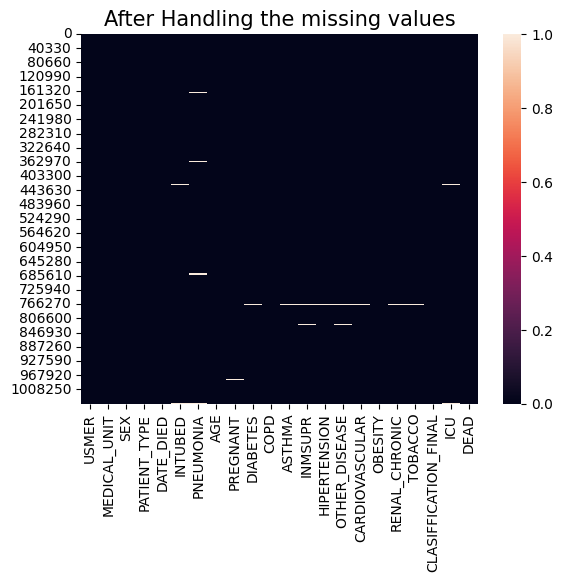

In [44]:
sns.heatmap(df_null2.isnull())
plt.title('After Handling the missing values', color = 'black', fontsize = 15)
plt.show()

In [45]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,1.968,0.177,1.0,2.0,2.0,2.0,2.0
PNEUMONIA,1.864,0.342,1.0,2.0,2.0,2.0,2.0
AGE,41.783,16.890,0.0,30.0,40.0,53.0,121.0
PREGNANT,1.992,0.088,1.0,2.0,2.0,2.0,2.0
DIABETES,1.880,0.324,1.0,2.0,2.0,2.0,2.0
COPD,1.986,0.119,1.0,2.0,2.0,2.0,2.0


In [46]:
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i, "->", dict(df[i].value_counts()))

USMER -> {2: 662903, 1: 385672}
MEDICAL_UNIT -> {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX -> {1: 525064, 2: 523511}
PATIENT_TYPE -> {1: 848544, 2: 200031}
INTUBED -> {2.0: 1007594, 1.0: 33656}
PNEUMONIA -> {2.0: 892534, 1.0: 140038}
PREGNANT -> {2.0: 1036690, 1.0: 8131}
DIABETES -> {2.0: 920248, 1.0: 124989}
COPD -> {2.0: 1030510, 1.0: 15062}
ASTHMA -> {2.0: 1014024, 1.0: 31572}
INMSUPR -> {2.0: 1031001, 1.0: 14170}
HIPERTENSION -> {2.0: 882742, 1.0: 162729}
OTHER_DISEASE -> {2.0: 1015490, 1.0: 28040}
CARDIOVASCULAR -> {2.0: 1024730, 1.0: 20769}
OBESITY -> {2.0: 885727, 1.0: 159816}
RENAL_CHRONIC -> {2.0: 1026665, 1.0: 18904}
TOBACCO -> {2.0: 960979, 1.0: 84376}
CLASIFFICATION_FINAL -> {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU -> {2.0: 1024229, 1.0: 16858}
DEAD -> {0: 971633, 1: 76942}


In [47]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,NaT,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,NaT,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,NaT,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


# Exploratory Data Analyis


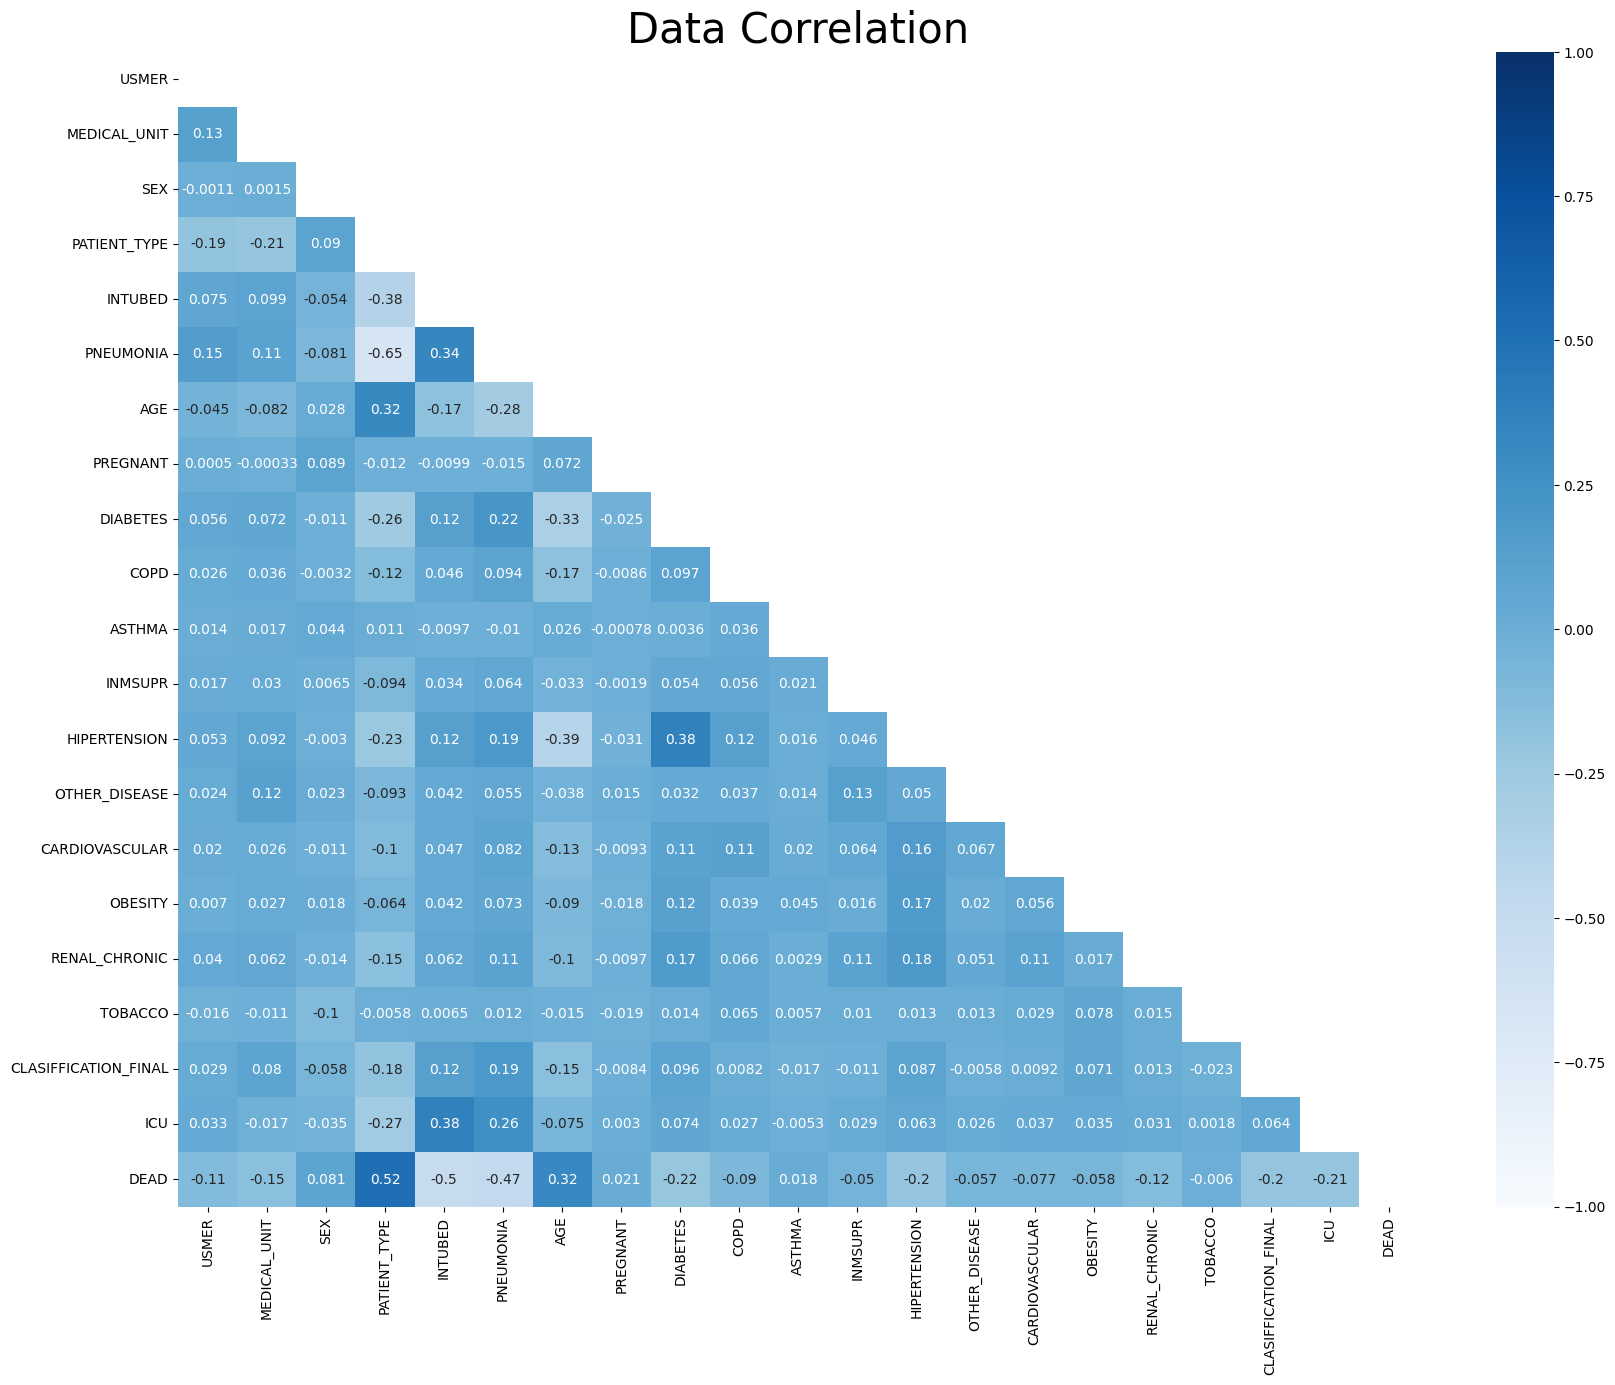

In [48]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['DATE_DIED']).corr()))
sns.heatmap(df.drop(columns=['DATE_DIED']).corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

In [49]:
df_med = df.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED','INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [50]:
df_med.duplicated(keep = False).sum()

1046563

In [51]:
dict(df['DEAD'].value_counts())[1]

76942

Text(0, 0.5, 'Count')

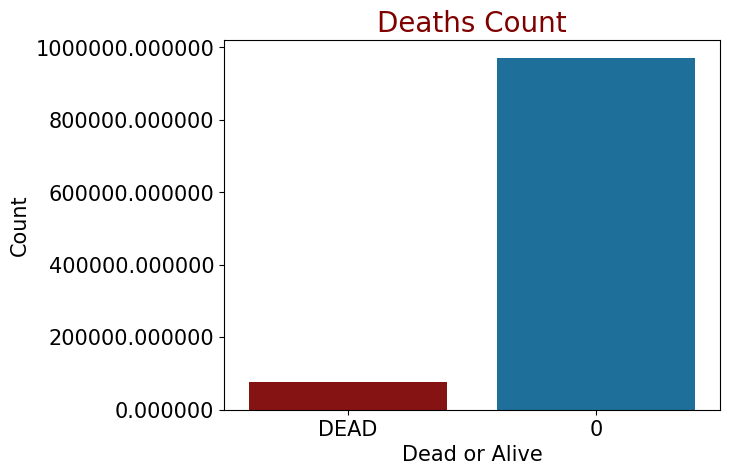

In [52]:
D = df['DEAD']
D = D.replace(1, "DEAD")
D = D.replace(2, "Alive")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%f'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Deaths Count', color = '#800000', fontsize = 20)
sns.countplot(x=D, palette = ['#990000', '#0a75ad'])
plt.xlabel('Dead or Alive', fontsize=15)
plt.ylabel('Count', fontsize=15)

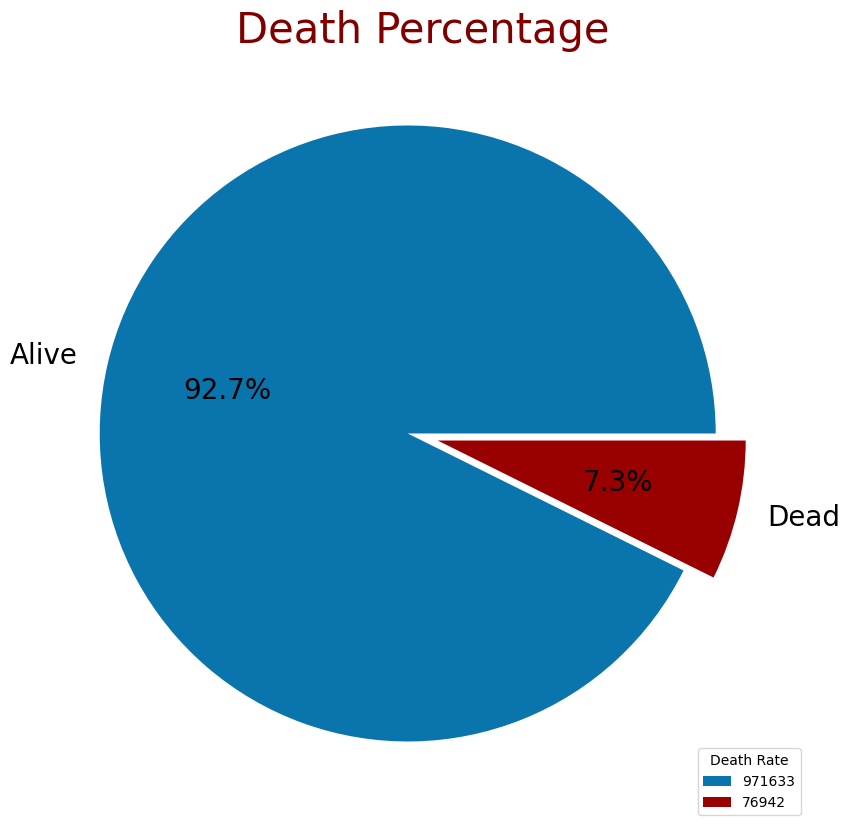

In [53]:
labels = ['Alive', 'Dead']
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color': "black"}, colors = colors, explode=[0.05, 0.05])
plt.title('Death Percentage', color = '#800000', fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [54]:
df_dead = df[df["DEAD"] == 1]
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1


In [55]:
df_dead["CLASIFFICATION_FINAL"].value_counts()

3    51430
7    13695
6     7652
2     1851
5     1211
1      955
4      148
Name: CLASIFFICATION_FINAL, dtype: int64

In [56]:
def Covid_or_Not(val):
    if val >= 4:
        return "Patient is not a Covid 19 Carrier"
    else:
        return "Patient is a Covid 19 Carrier"

In [57]:
df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

In [58]:
df_dead

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,Patient is a Covid 19 Carrier
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1,Patient is not a Covid 19 Carrier
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,Patient is a Covid 19 Carrier
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1,Patient is not a Covid 19 Carrier
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,Patient is a Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,2,2,2020-07-18,1.0,1.0,73.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,Patient is a Covid 19 Carrier
1047636,1,13,2,1,2020-07-26,2.0,1.0,82.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,Patient is a Covid 19 Carrier
1047637,1,13,1,1,2020-07-27,2.0,1.0,82.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,Patient is a Covid 19 Carrier
1047638,1,13,2,2,2020-07-29,1.0,1.0,80.0,2.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,3,2.0,1,Patient is a Covid 19 Carrier


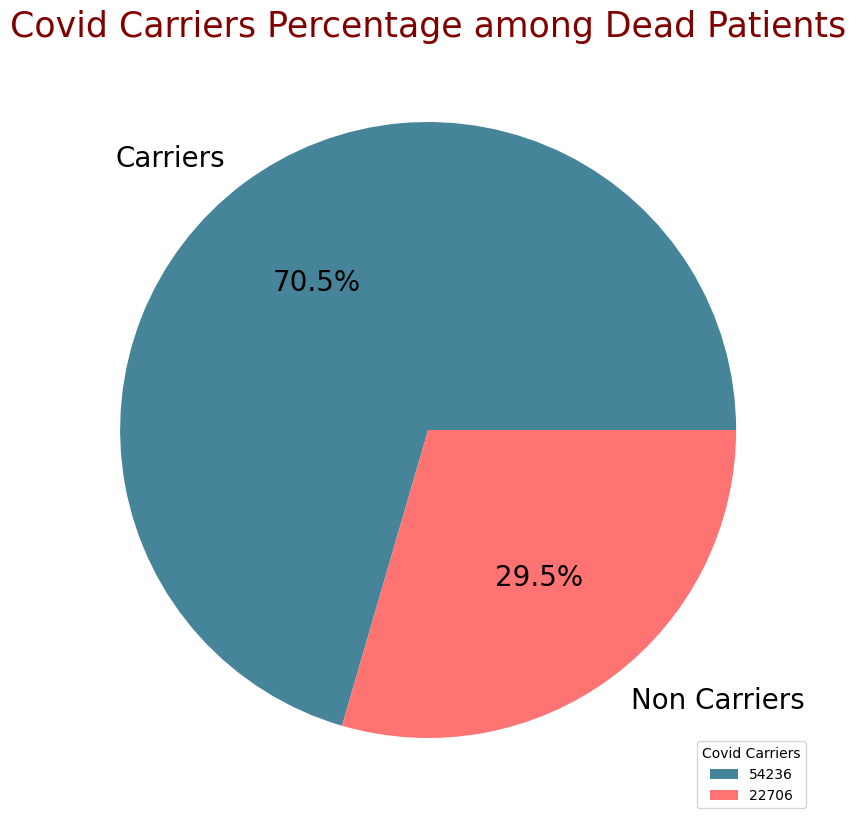

In [59]:
labels = ['Carriers', 'Non Carriers']
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among Dead Patients', color = 'Maroon', fontsize = 25)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [60]:
df_dead["Covid_or_Not"].value_counts()

Patient is a Covid 19 Carrier        54236
Patient is not a Covid 19 Carrier    22706
Name: Covid_or_Not, dtype: int64

In [61]:
df['Covid_or_Not'] = df["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

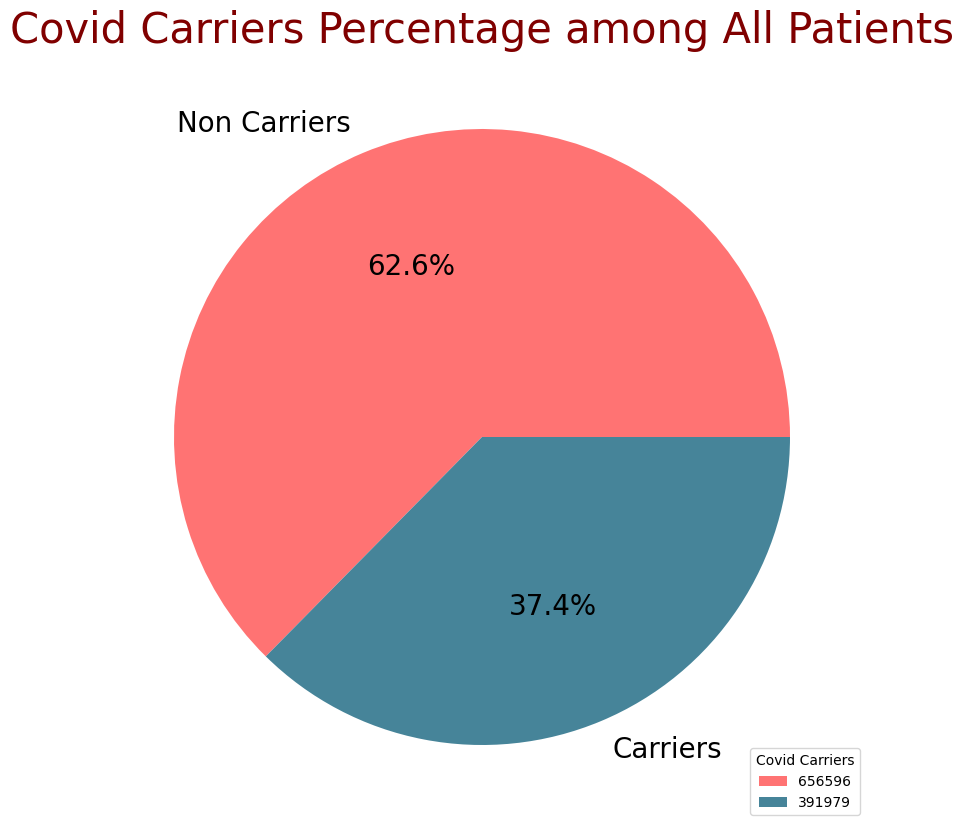

In [62]:
labels = ["Non Carriers", "Carriers"]
sizes = df['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among All Patients', color = 'Maroon', fontsize = 30)
plt.legend(df['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [63]:
df["Covid_or_Not"].value_counts()

Patient is not a Covid 19 Carrier    656596
Patient is a Covid 19 Carrier        391979
Name: Covid_or_Not, dtype: int64

In [64]:
Covid_deaths = df[(df['Covid_or_Not'] == "A Covid 19 Carrier")]

In [65]:
Covid_deaths["DEAD"].value_counts()

Series([], Name: DEAD, dtype: int64)

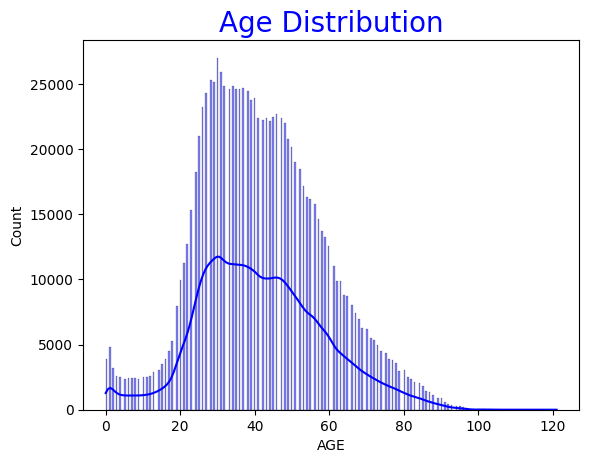

In [67]:
sns.histplot(x=df.AGE, kde = True, color = 'blue')
plt.title('Age Distribution', color = 'blue', fontsize = 20)
plt.show()

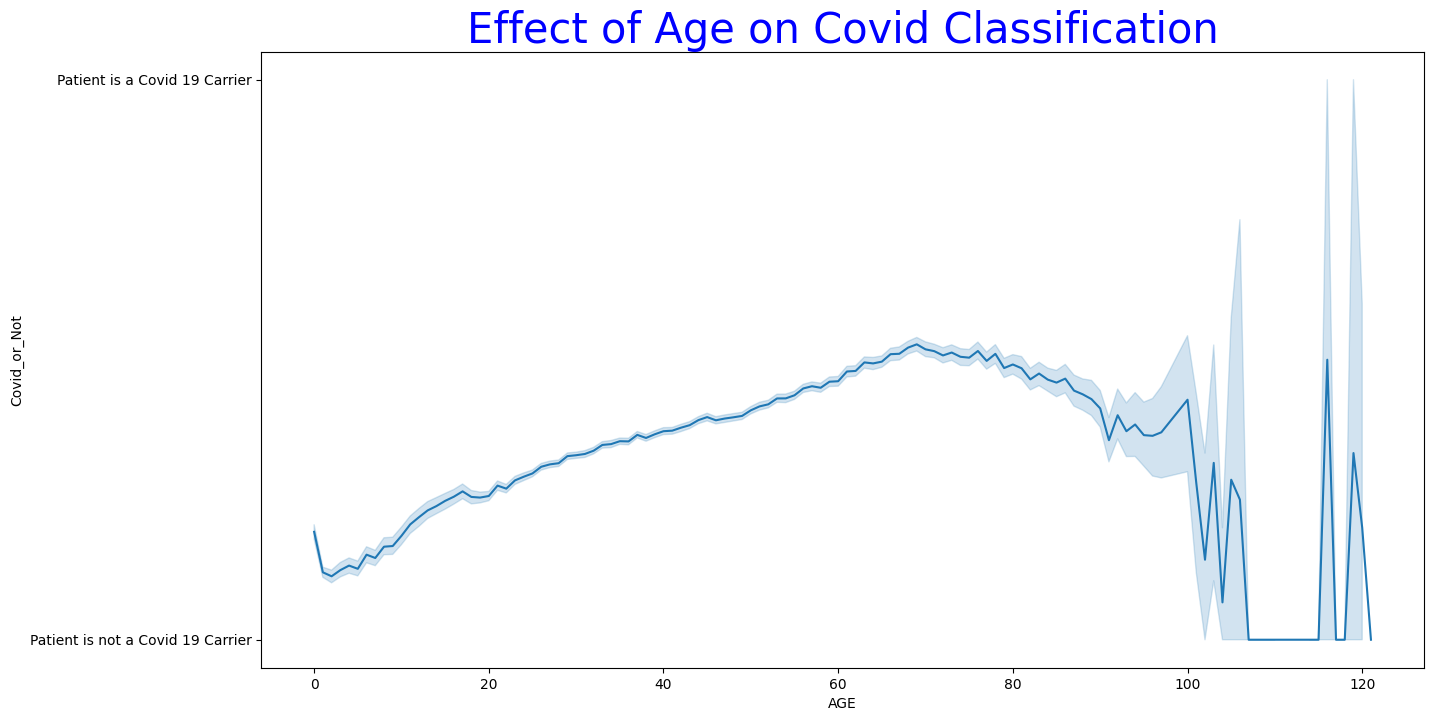

In [68]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="AGE", y="Covid_or_Not")
plt.title('Effect of Age on Covid Classification', color = 'blue', fontsize = 30)
plt.show()

In [70]:
df_mod = df.copy()

In [71]:
df_mod['OBESITY'] = ['Obese' if i==1 else "Not Obese" for i in df.OBESITY]

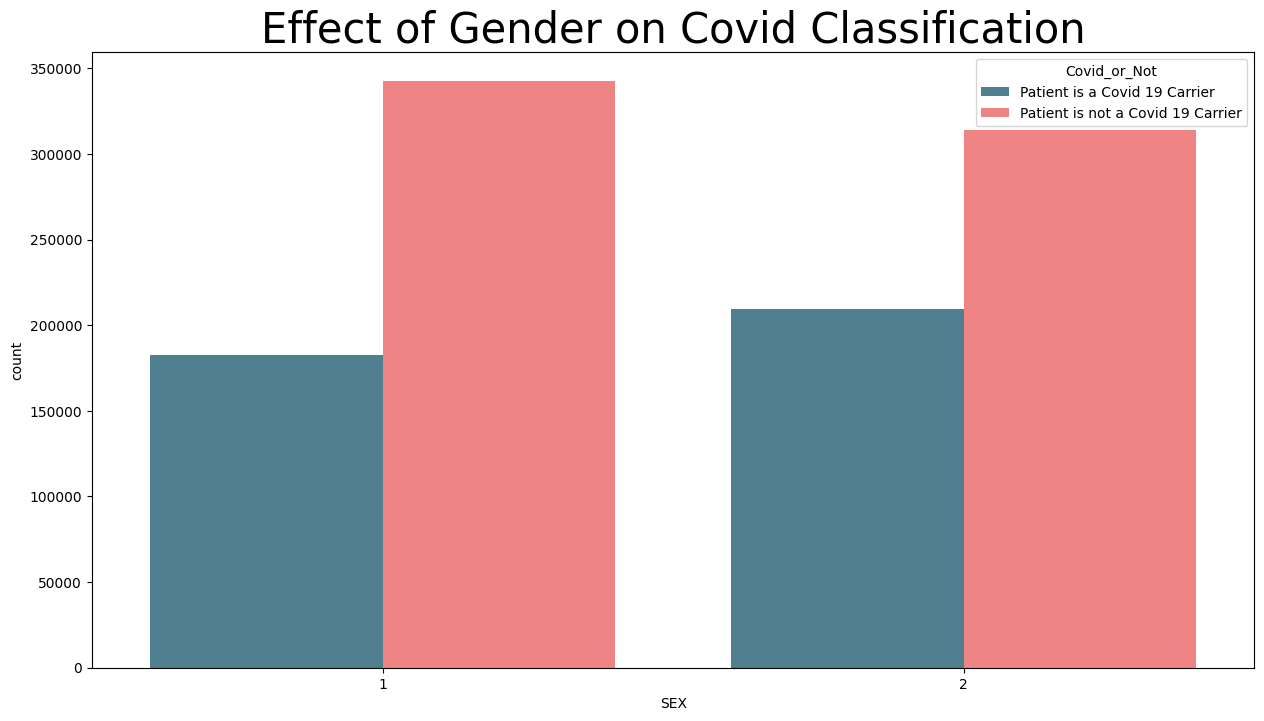

In [72]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_mod, x="SEX", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()

In [73]:
df_preg = df[df['SEX'] == 1]
df_preg['PREGNANT'].value_counts()

2.0    513179
1.0      8131
Name: PREGNANT, dtype: int64

In [74]:
df_preg['PREGNANT'] = ['Pregnant' if i==1 else 'Non Pregnant' for i in df_preg.PREGNANT]

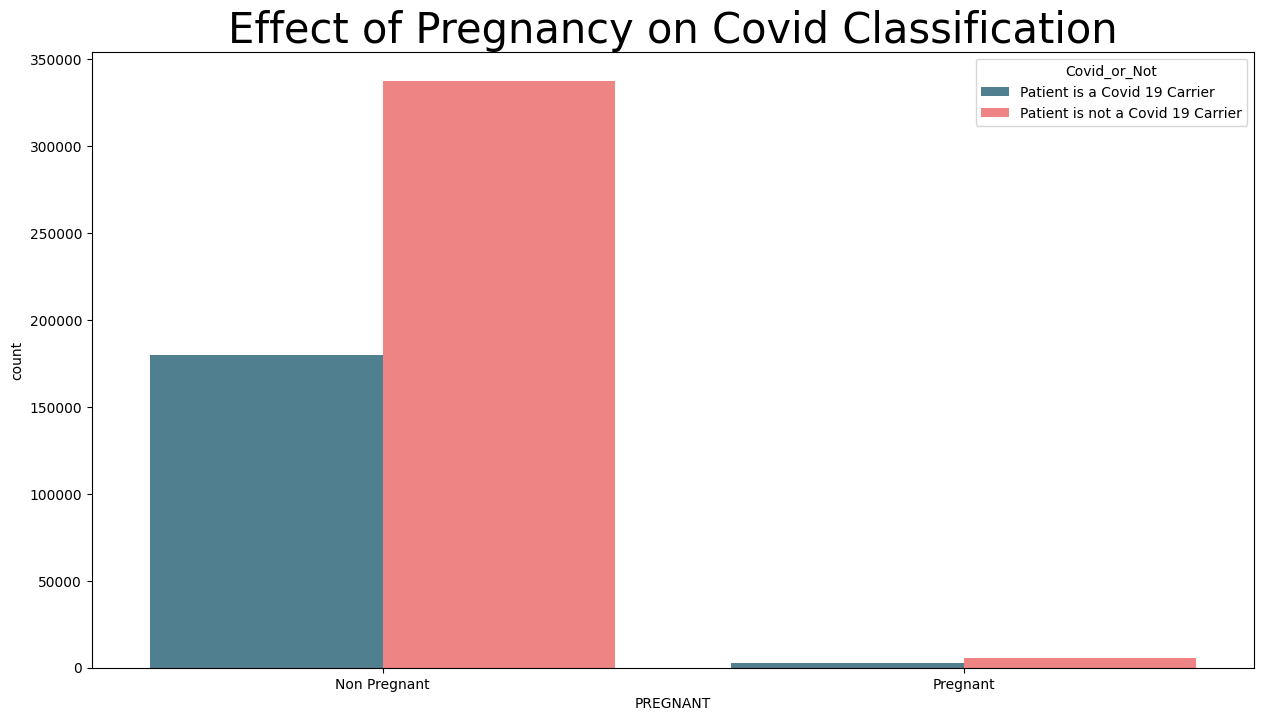

In [75]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_preg, x="PREGNANT", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Pregnancy on Covid Classification', color = 'black', fontsize = 30)
plt.show()

In [76]:
df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()

Patient is not a Covid 19 Carrier    5377
Patient is a Covid 19 Carrier        2754
Name: Covid_or_Not, dtype: int64

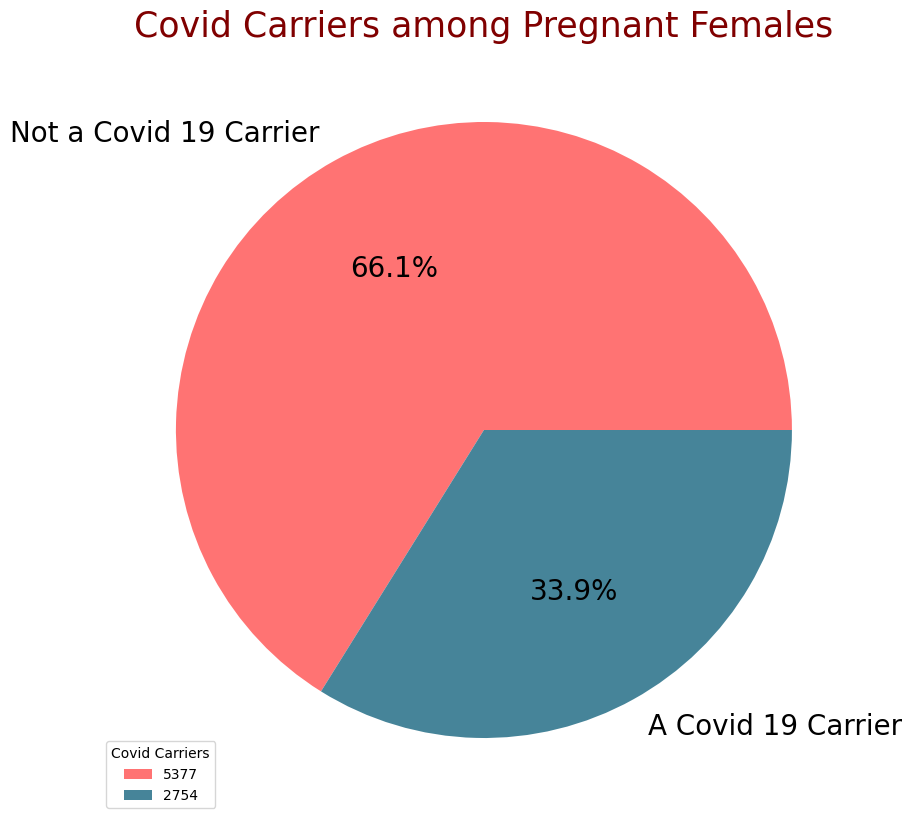

In [77]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == 'Pregnant')]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [78]:
df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts()

Patient is not a Covid 19 Carrier    337197
Patient is a Covid 19 Carrier        179736
Name: Covid_or_Not, dtype: int64

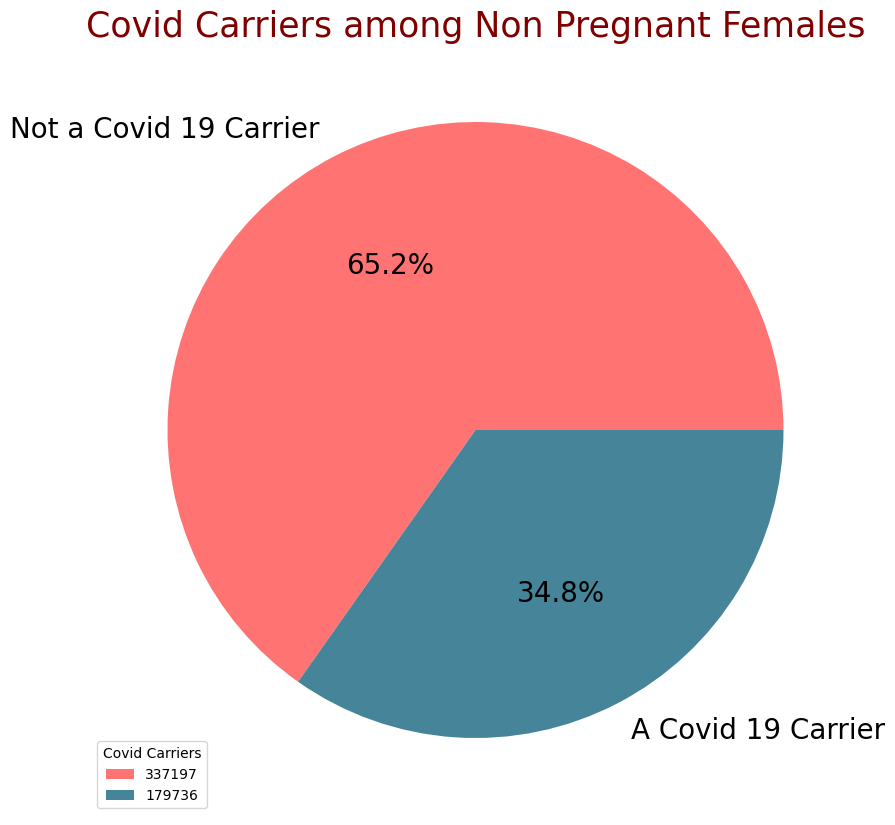

In [79]:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['PREGNANT'] == 'Non Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['PREGNANT'] == "Non Pregnant")]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Non Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

In [80]:
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [81]:
df_diseases = df_med.drop(columns = ["PREGNANT", "OBESITY", 'DEAD'])

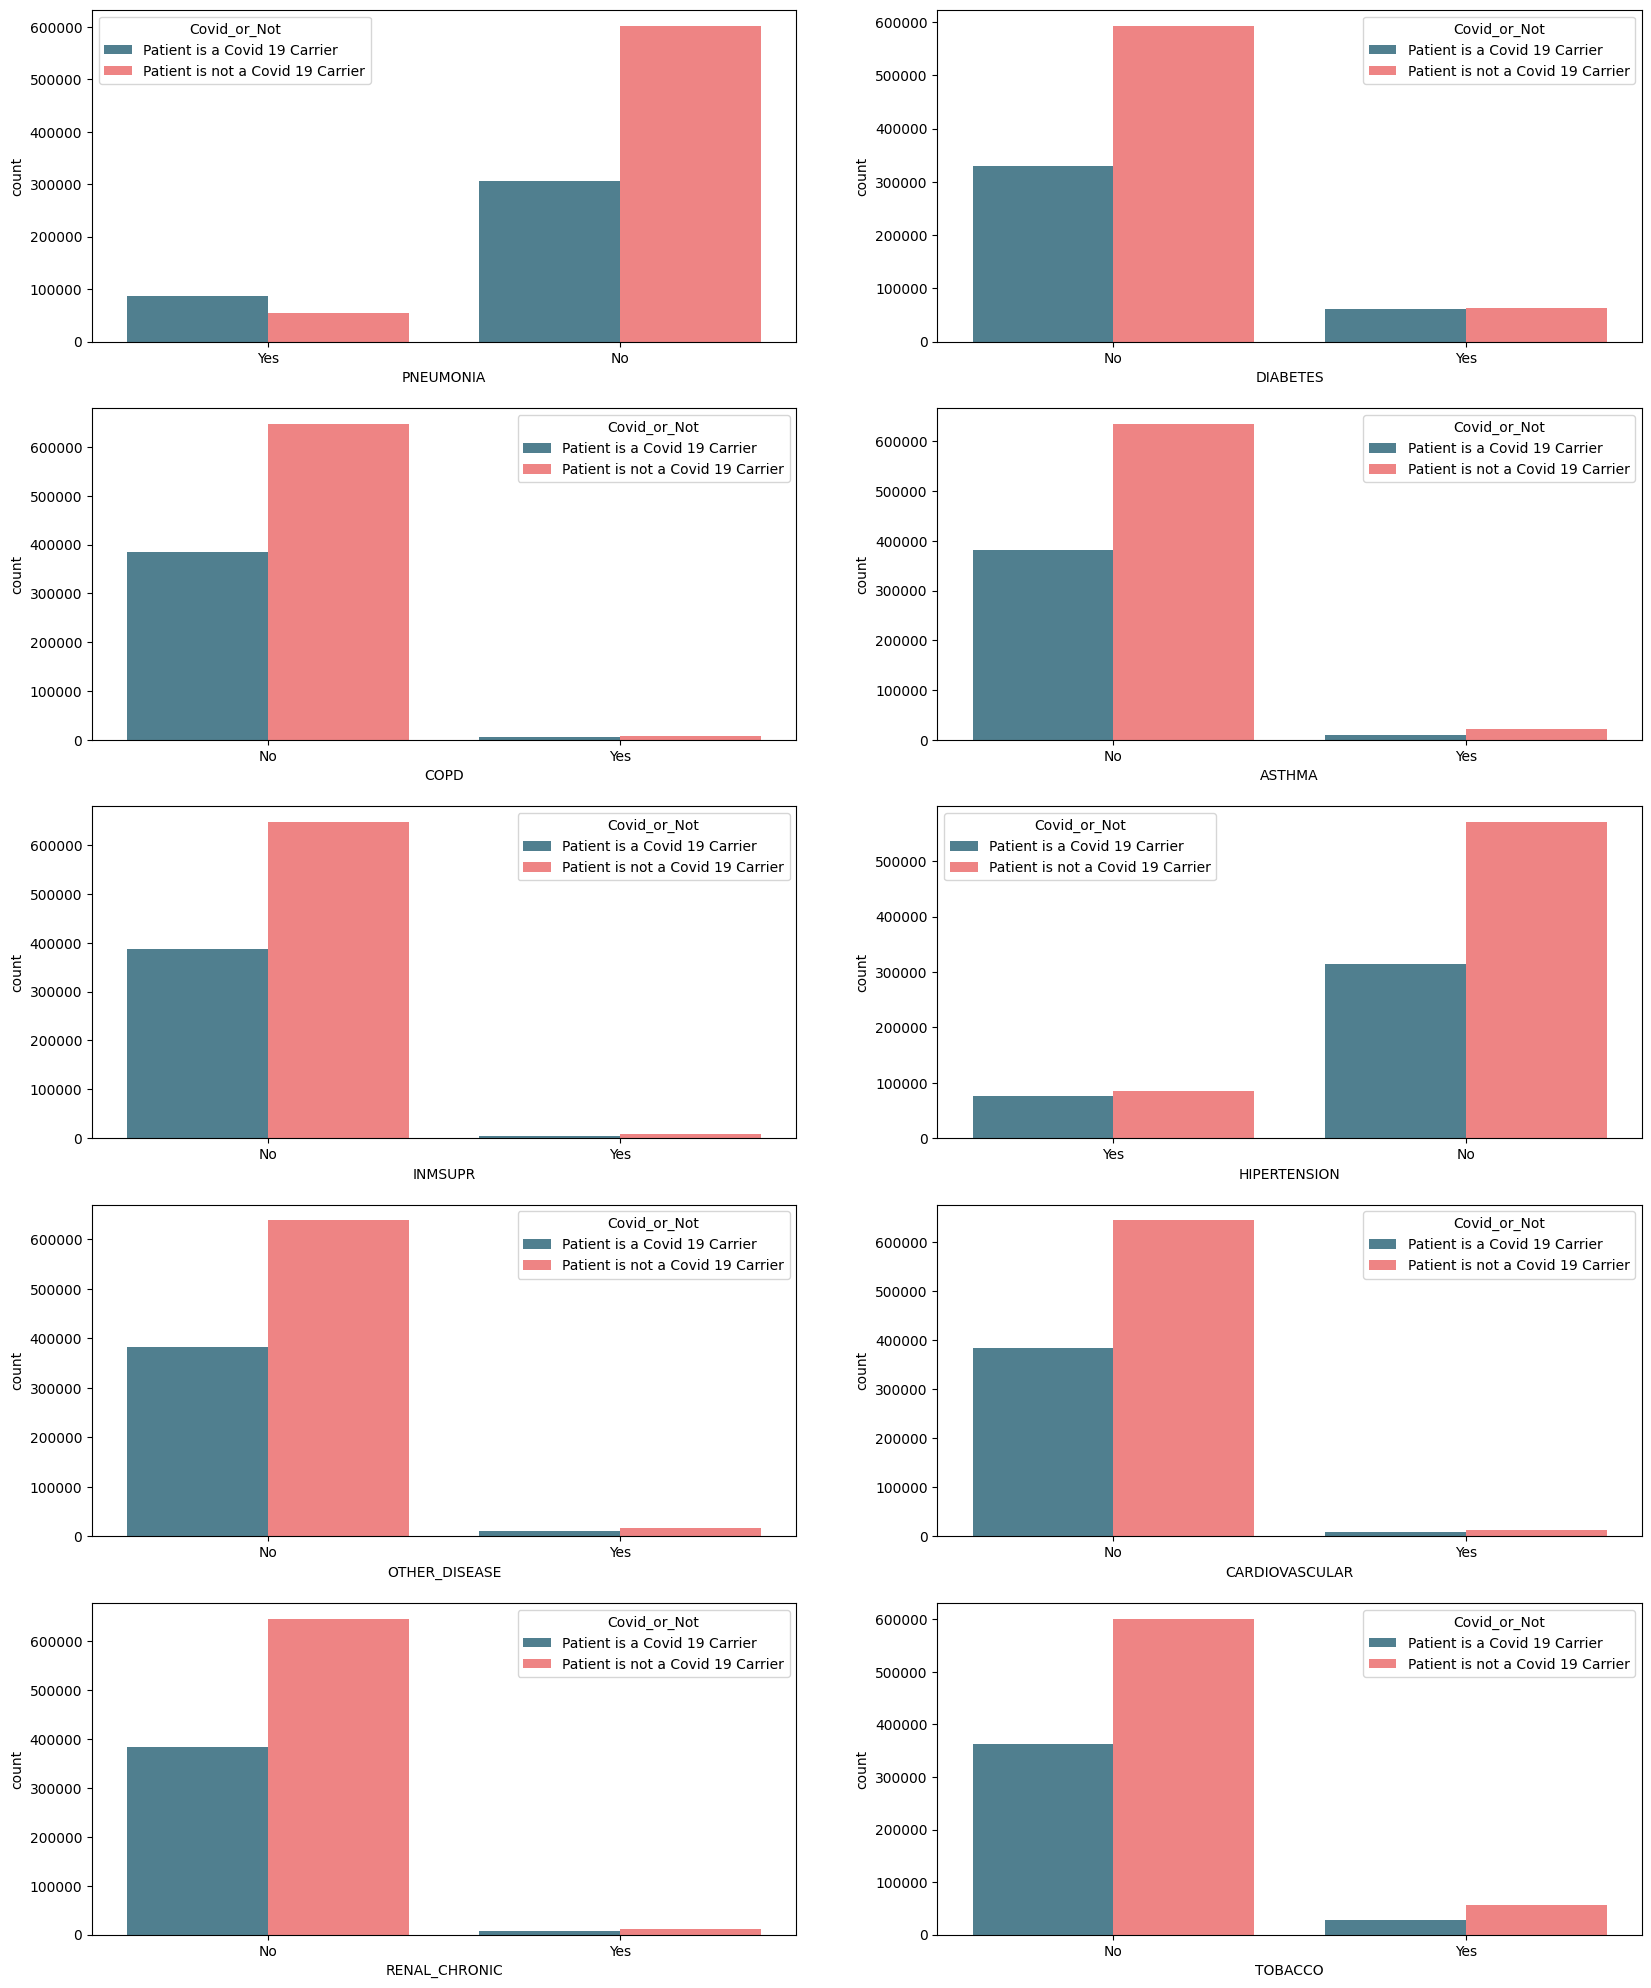

In [82]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    df_diseases[i] = ["Yes" if j==1 else "No" for j in df_diseases[i]]
    sns.countplot(data=df_diseases, x=i, hue=df["Covid_or_Not"], palette = ['#468499', '#ff7373'])
    index += 1
plt.show()

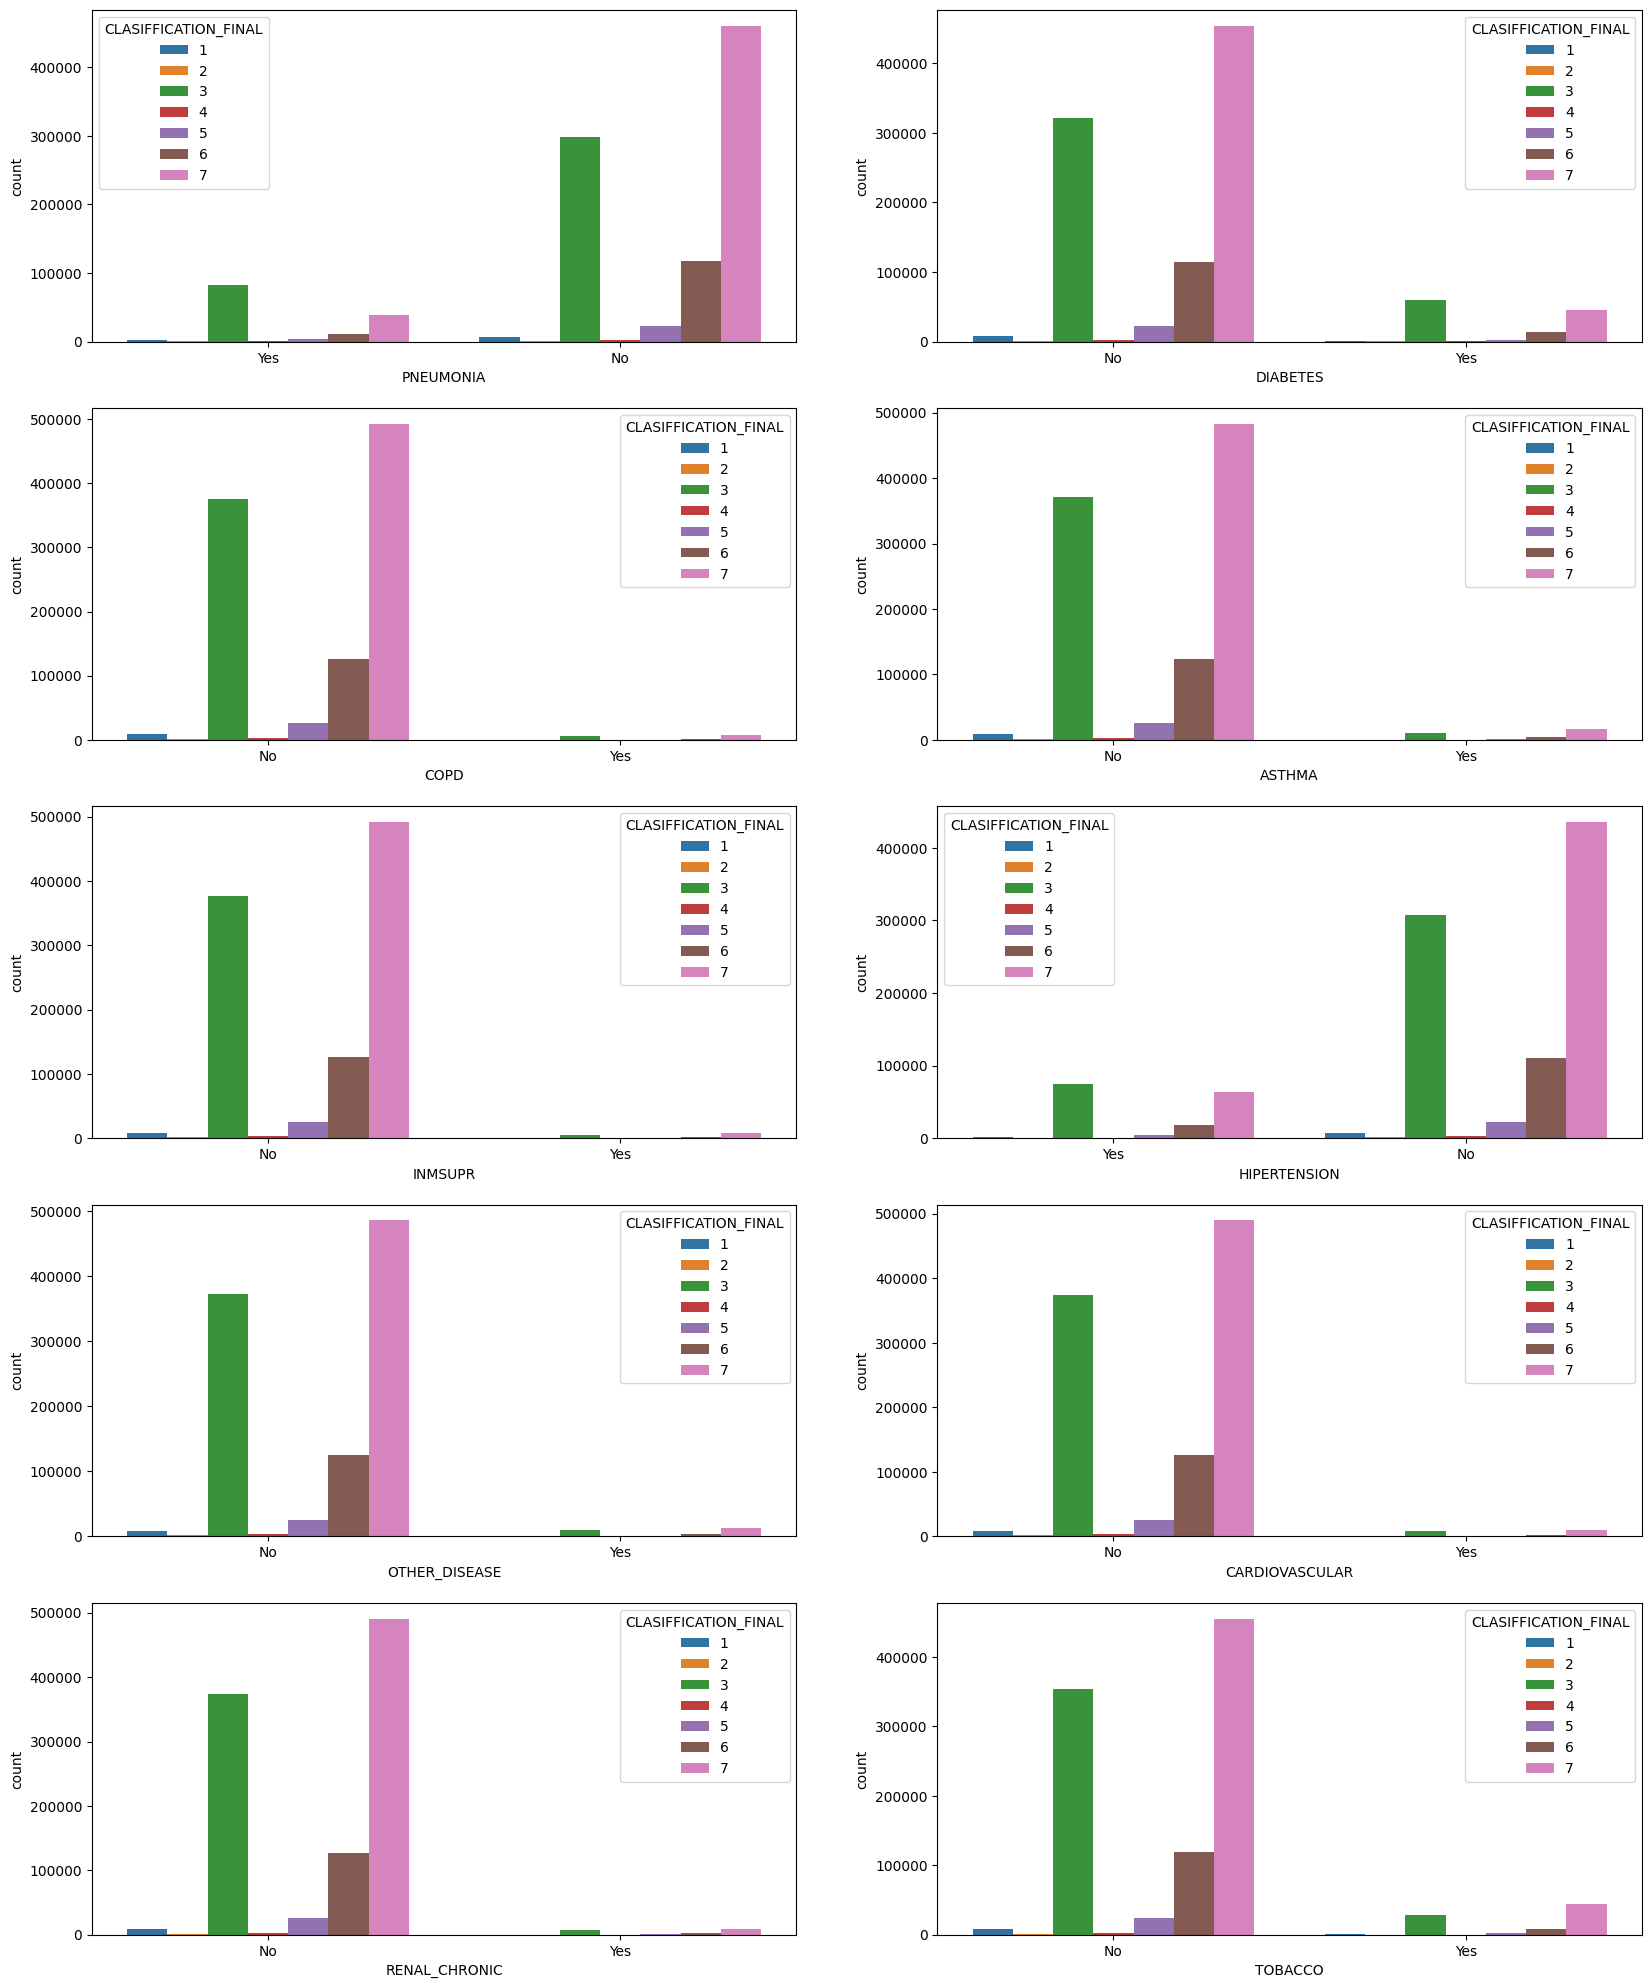

In [83]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases.columns:
    plt.subplot(5, 2, index)
    sns.countplot(data=df_diseases, x=i, hue=df['CLASIFFICATION_FINAL'],)

    index += 1
plt.show()

In [84]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')

In [85]:
df['PATIENT_TYPE'].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

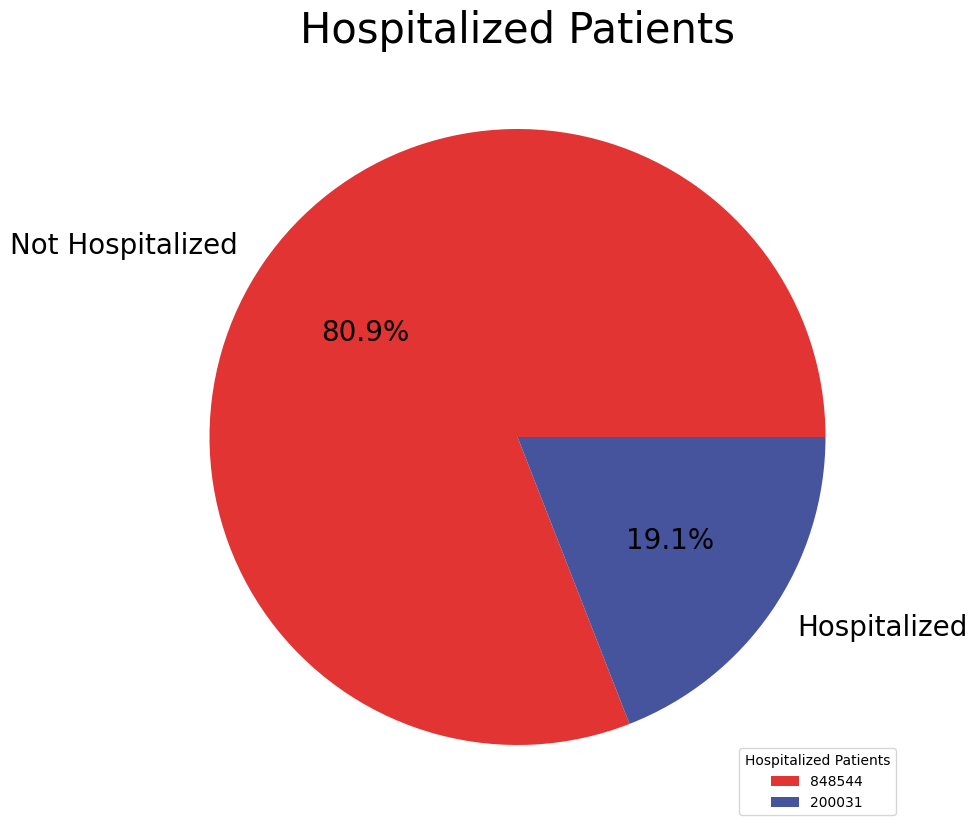

In [86]:
labels = ["Not Hospitalized", "Hospitalized"]
sizes = df['PATIENT_TYPE'].value_counts()
colors = ['#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('Hospitalized Patients',color = 'black',fontsize = 30)
plt.legend(df['PATIENT_TYPE'].value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

In [91]:
df_hosp = df[df['PATIENT_TYPE']==2]

In [92]:
df_hosp['DEAD'] = df_hosp['DEAD'].replace(1, 'Dead')
df_hosp['DEAD'] = df_hosp['DEAD'].replace(0, 'Alive')

In [93]:
df_hosp['DEAD'].value_counts()

Alive    129965
Dead      70066
Name: DEAD, dtype: int64

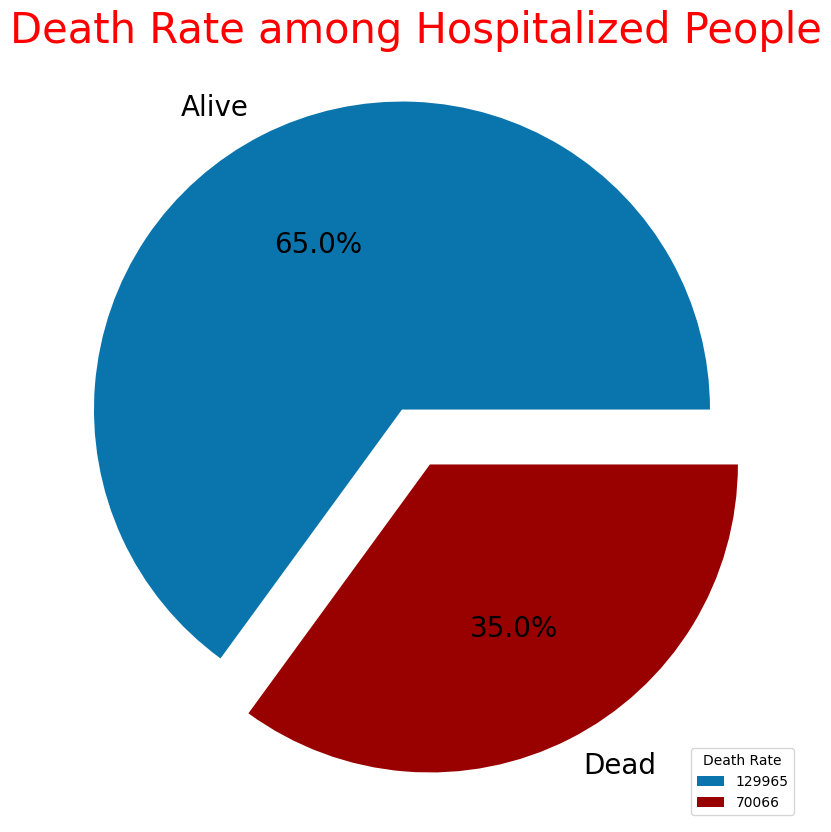

In [94]:
labels = ["Alive", "Dead"]
sizes = df_hosp['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [95]:
print(df_diseases.shape)
print(df_diseases.columns)

(1048575, 10)
Index(['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'TOBACCO'],
      dtype='object')


In [96]:
print(df_hosp.shape)
print(df_hosp.columns)

(200031, 23)
Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')


In [97]:
df_diseases2 = df_hosp.drop(columns = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'AGE', 'PREGNANT', 'OBESITY', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD', 'Covid_or_Not'])

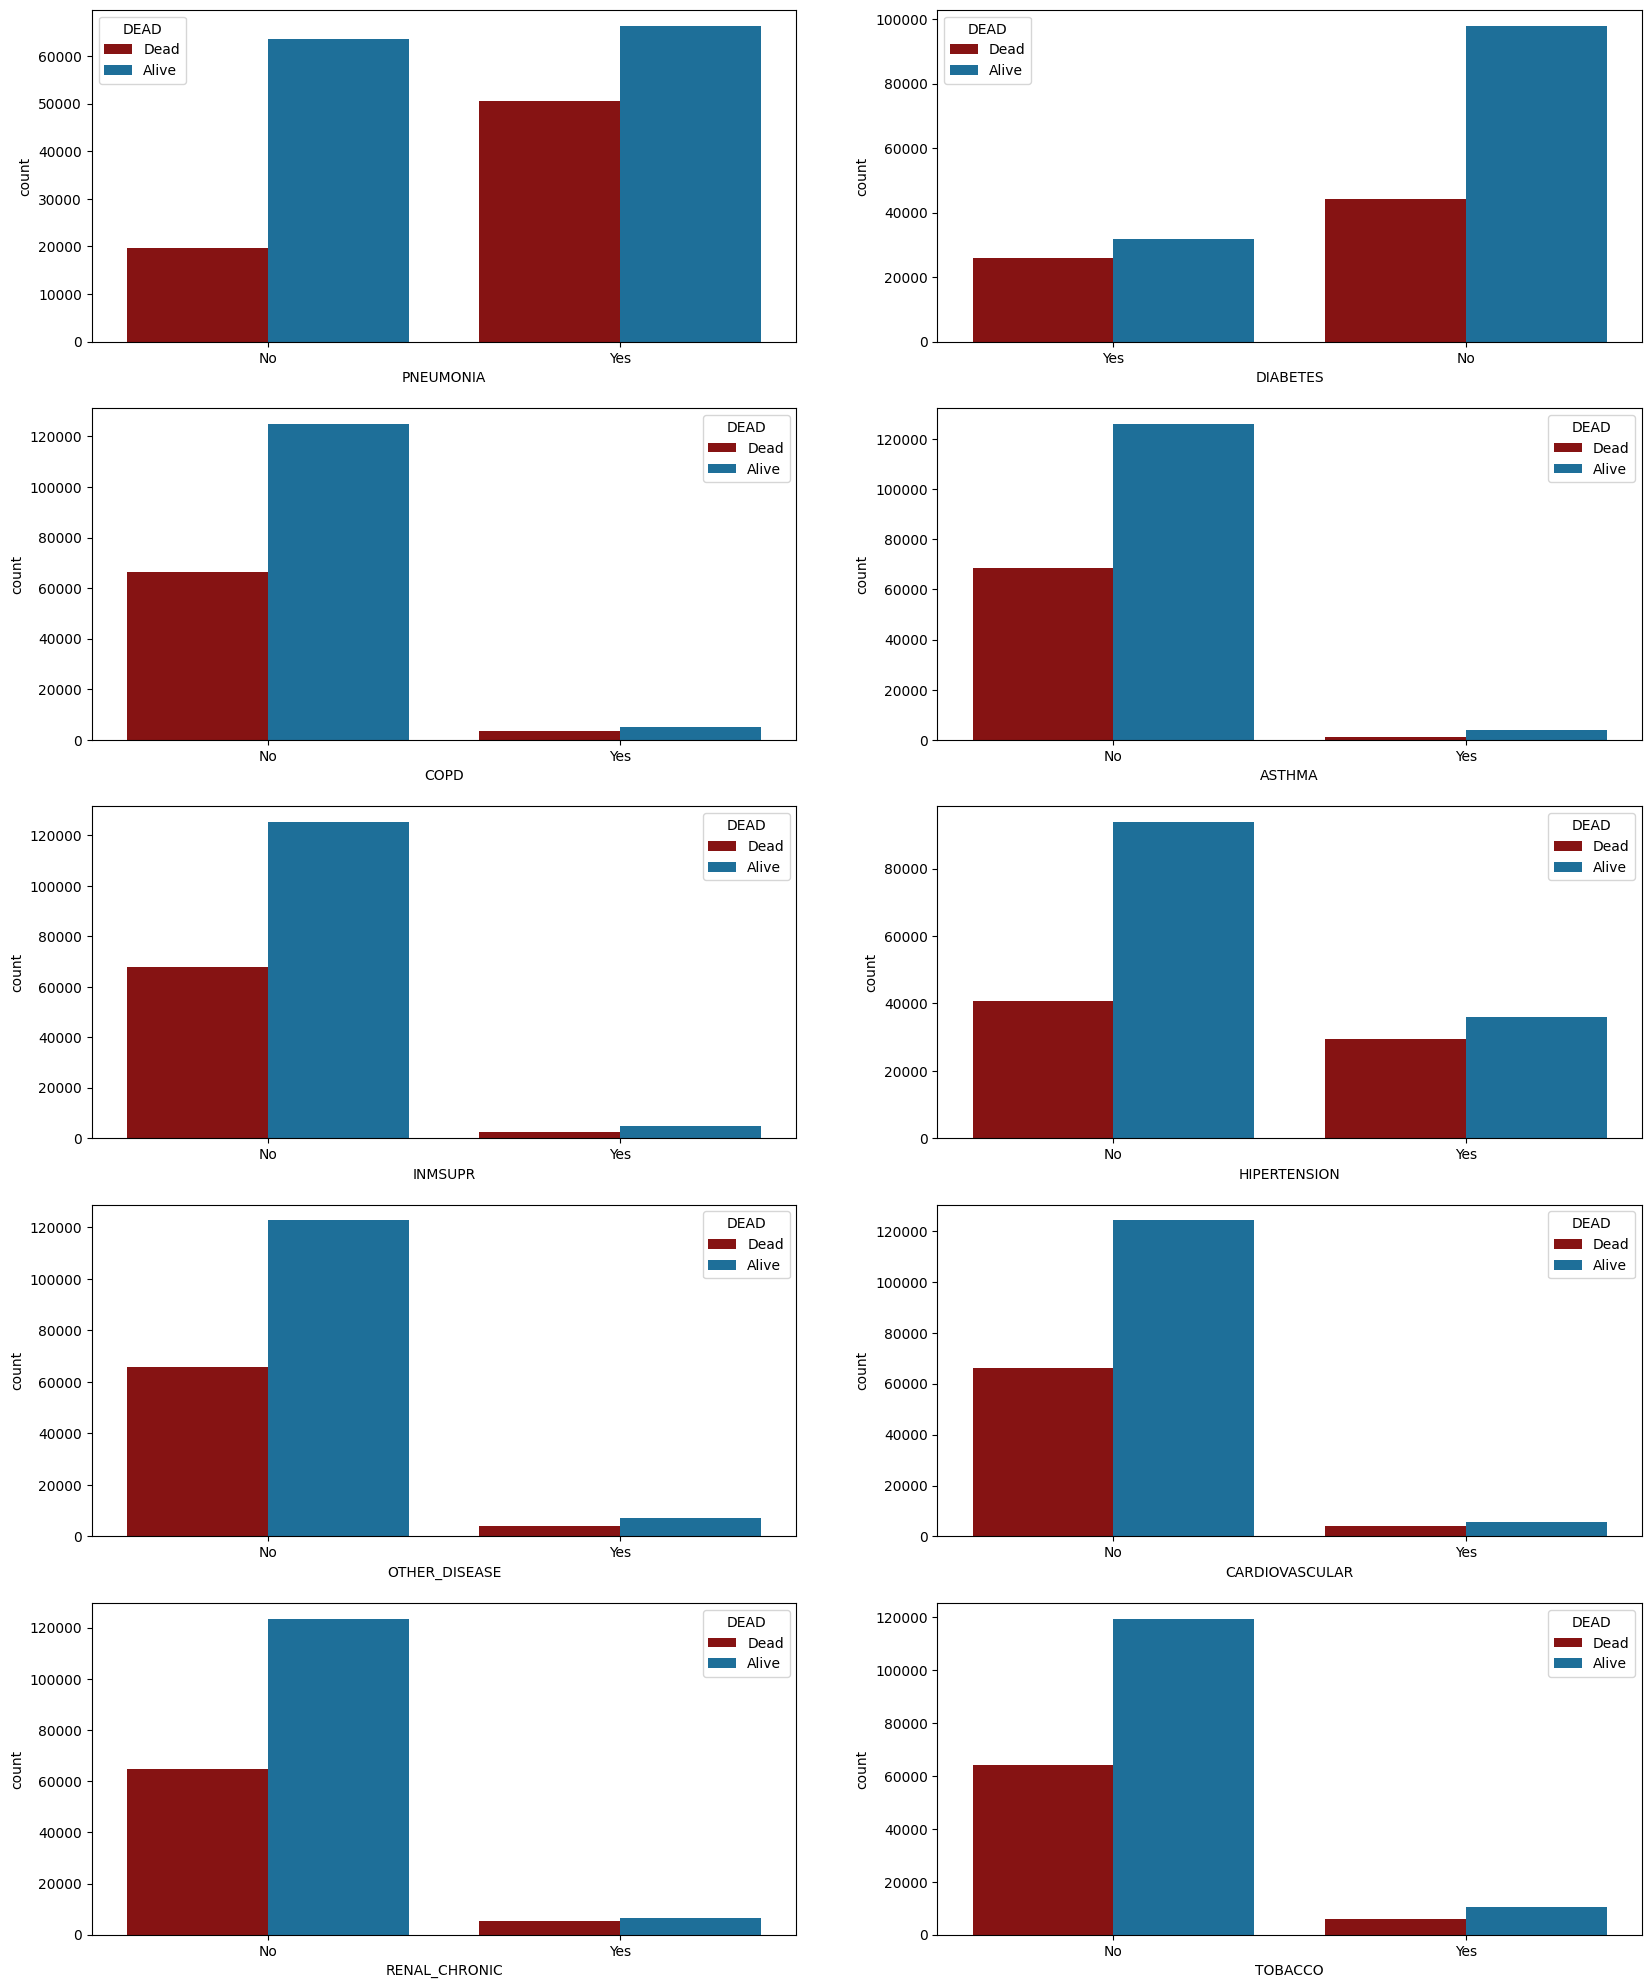

In [98]:
plt.figure(figsize=(20, 25))
index = 1
for i in df_diseases2.columns:
    plt.subplot(5, 2, index)
    df_diseases2[i] = ["Yes" if j==1 else "No" for j in df_diseases2[i]]
    sns.countplot(data=df_diseases2, x=i, hue=df_hosp['DEAD'],
                  palette = [ '#990000', '#0a75ad'])
    index += 1
plt.show()

In [99]:
df_dead.PATIENT_TYPE.value_counts()

2    70066
1     6876
Name: PATIENT_TYPE, dtype: int64

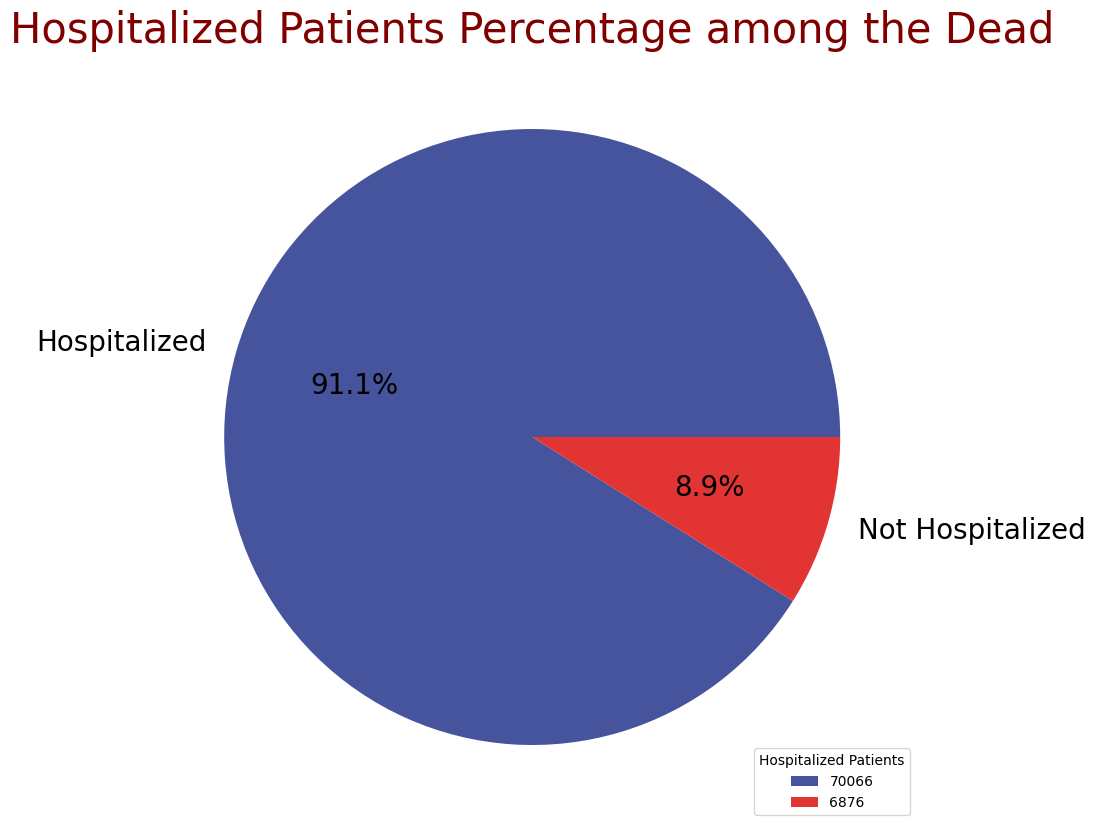

In [100]:
labels = ["Hospitalized", "Not Hospitalized"]
sizes = df_dead.PATIENT_TYPE.value_counts()
colors = ['#46549d', '#e13433']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Hospitalized Patients Percentage among the Dead', color = 'Maroon', fontsize = 30)
plt.legend(df_dead.PATIENT_TYPE.value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()

In [101]:
df[(df['PATIENT_TYPE'] == 2) & (df['ICU'] == 1)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD,Covid_or_Not
16,2,1,1,2,NaT,2.0,1.0,80.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier
20,2,1,2,2,NaT,2.0,1.0,59.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,3,1.0,0,Patient is a Covid 19 Carrier
41,2,1,2,2,NaT,1.0,1.0,45.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,1.0,0,Patient is a Covid 19 Carrier
56,2,1,1,2,NaT,1.0,1.0,58.0,2.0,2.0,...,1.0,2.0,1.0,1.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
57,2,1,1,2,NaT,1.0,1.0,48.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048255,1,13,2,2,NaT,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
1048270,2,13,1,2,NaT,1.0,1.0,22.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
1048358,1,13,1,2,NaT,1.0,2.0,44.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,1.0,0,Patient is not a Covid 19 Carrier
1048364,1,13,2,2,NaT,1.0,1.0,55.0,2.0,2.0,...,1.0,2.0,2.0,1.0,2.0,1.0,7,1.0,0,Patient is not a Covid 19 Carrier


In [102]:
df.ICU.value_counts()

2.0    1024229
1.0      16858
Name: ICU, dtype: int64

In [103]:
df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()

2.0    175685
1.0     16858
Name: ICU, dtype: int64

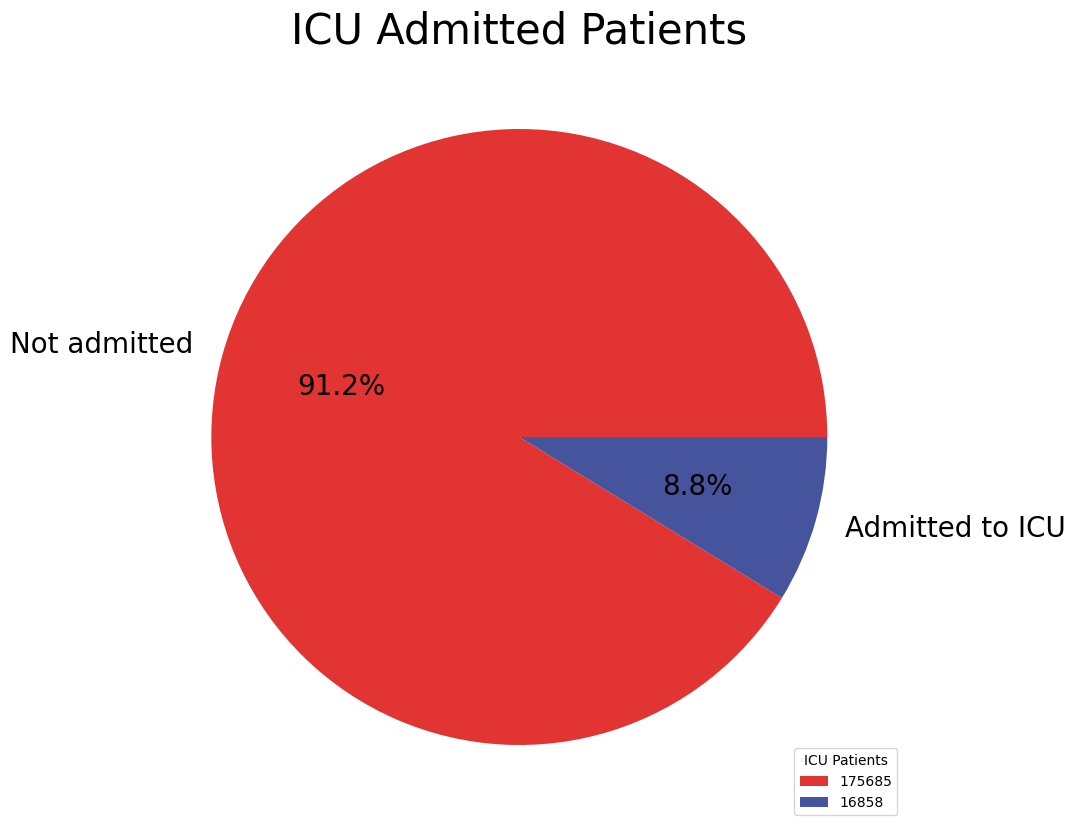

In [104]:
labels = ["Not admitted", "Admitted to ICU"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts()
colors = [ '#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('ICU Admitted Patients',color = 'black',fontsize = 30)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower right',
           title = 'ICU Patients')
plt.show()

In [ ]:
df[(df['CLASIFFICATION_FINAL'] < 4) & (df['ICU'] == 1)]

In [ ]:
16858 - 10449

In [105]:
df[(df['ICU'] == 1)]['CLASIFFICATION_FINAL'].value_counts()

3    10097
7     4951
6      953
5      465
1      255
2       97
4       40
Name: CLASIFFICATION_FINAL, dtype: int64

In [106]:
df[(df['ICU'] == 1)]['Covid_or_Not'].value_counts()

Patient is a Covid 19 Carrier        10449
Patient is not a Covid 19 Carrier     6409
Name: Covid_or_Not, dtype: int64

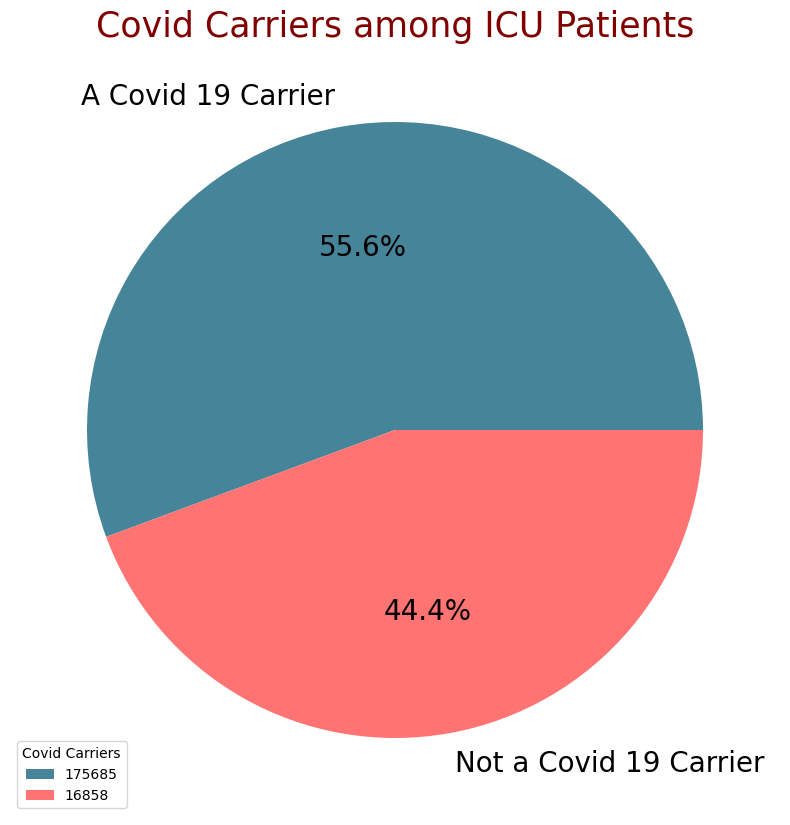

In [107]:
labels = ["A Covid 19 Carrier", "Not a Covid 19 Carrier"]
sizes = df[(df['PATIENT_TYPE'] == 2)]['Covid_or_Not'].value_counts()
colors = ['#468499', '#ff7373']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df[(df['PATIENT_TYPE'] == 2)]['ICU'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among ICU Patients', color = 'maroon', fontsize = 25)
plt.show()

In [108]:
df[(df['ICU'] == 1)]['DEAD'].value_counts()

0    8663
1    8195
Name: DEAD, dtype: int64

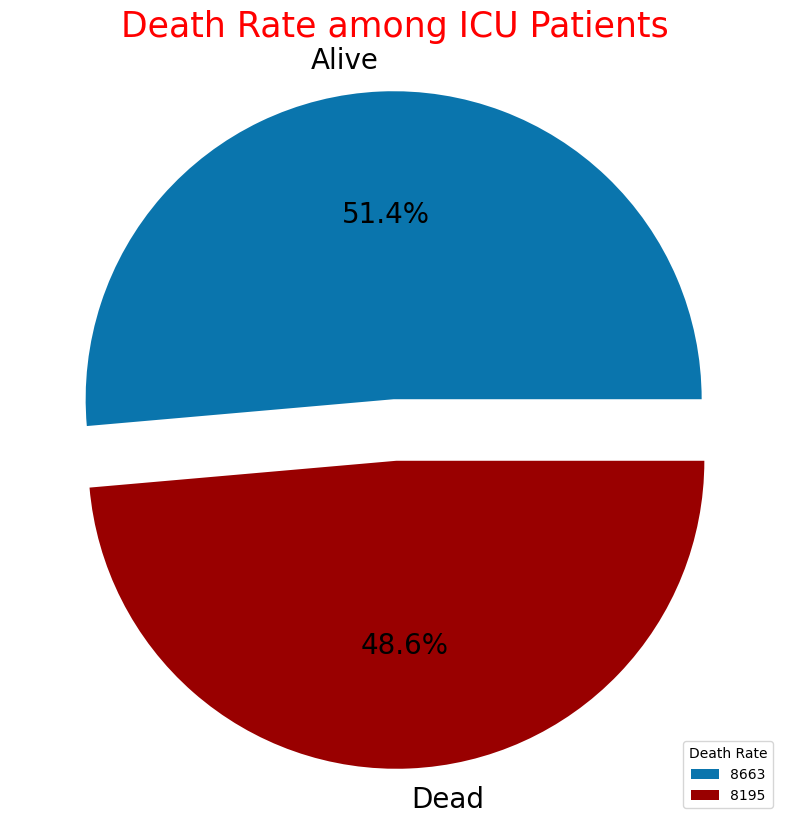

In [109]:
labels = ["Alive", "Dead"]
sizes = df[(df['ICU'] == 1)]['DEAD'].value_counts()
colors = [ '#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among ICU Patients', color = 'red', fontsize = 25)
plt.legend(df[(df['ICU'] == 1)]['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [110]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')

Text(0.5, 1.0, 'Death Trend through Time')

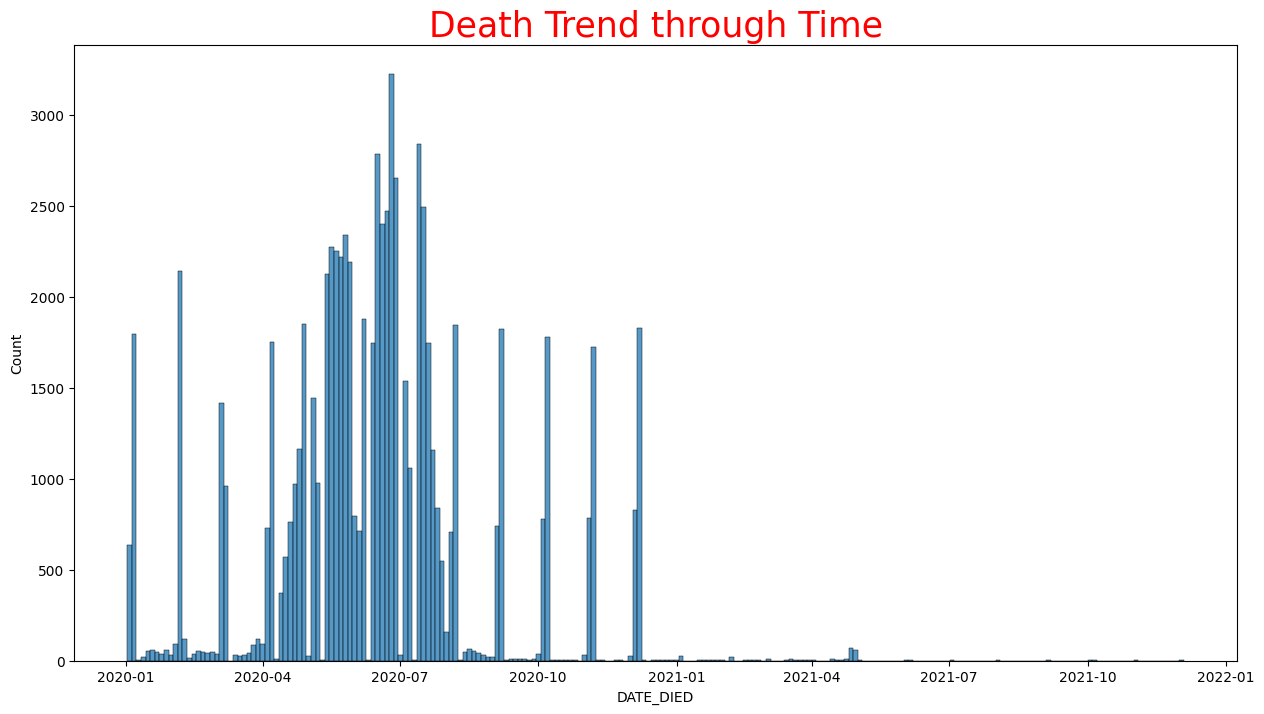

In [111]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='DATE_DIED')
plt.title('Death Trend through Time', color = 'red', fontsize = 25)

FEATURE SELECTION

In [112]:
# Create a new DataFrame 'df_model' by removing specific columns ('DATE_DIED' and 'SEX') from the 'df' DataFrame.
df_model = df.drop(columns = ['DATE_DIED', 'SEX'])

In [113]:
# Calculate the shape (number of rows and columns) of the DataFrame 'df_model' after removing rows with missing values.
df_model.dropna().shape

(1019473, 21)

In [114]:
# Display the shape (number of rows and columns) of the 'df_model' DataFrame.
df_model.shape

(1048575, 21)

In [115]:
# Total missing values
1048575 - 1019473

29102

In [116]:
#Percentage of total missing values
29102 / 1048575

0.027753856424194742

In [117]:
# Remove rows with missing values from the 'df_model' DataFrame in place.
df_model.dropna(inplace = True)

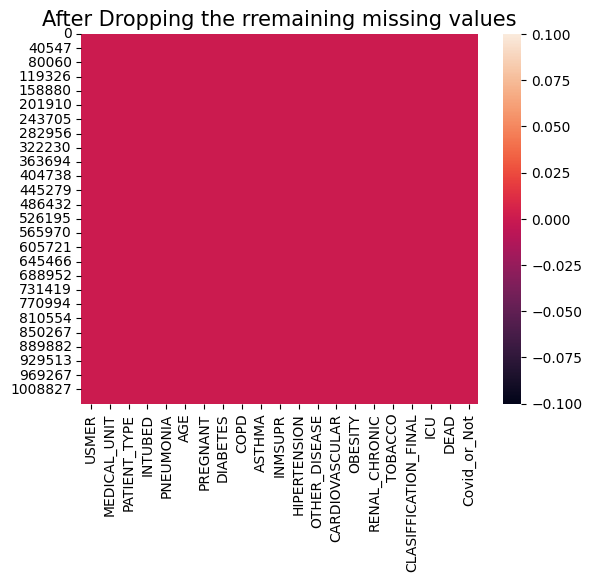

In [120]:
# Create a heatmap to visualize the presence of missing values in the 'df_model' DataFrame after dropping remaining missing values, with a title.
sns.heatmap(df_model.isnull())
plt.title('After Dropping the rremaining missing values', color = 'black', fontsize = 15)
plt.show()

In [122]:
# Count the frequency of each unique value in the 'Covid_or_Not' column of the 'df_model' DataFrame, which indicates Covid-19 carrier status.
df_model.Covid_or_Not.value_counts()

Patient is not a Covid 19 Carrier    633448
Patient is a Covid 19 Carrier        386025
Name: Covid_or_Not, dtype: int64

In [123]:
# Modify the 'Covid_or_Not' column in the 'df_model' DataFrame by mapping values to 2 for 'Patient is not a Covid 19 Carrier' and 1 for other cases.
df_model.Covid_or_Not = df_model.Covid_or_Not.apply(lambda x: 2 if x=='Patient is not a Covid 19 Carrier' else 1)

Eliminating unnecessary features

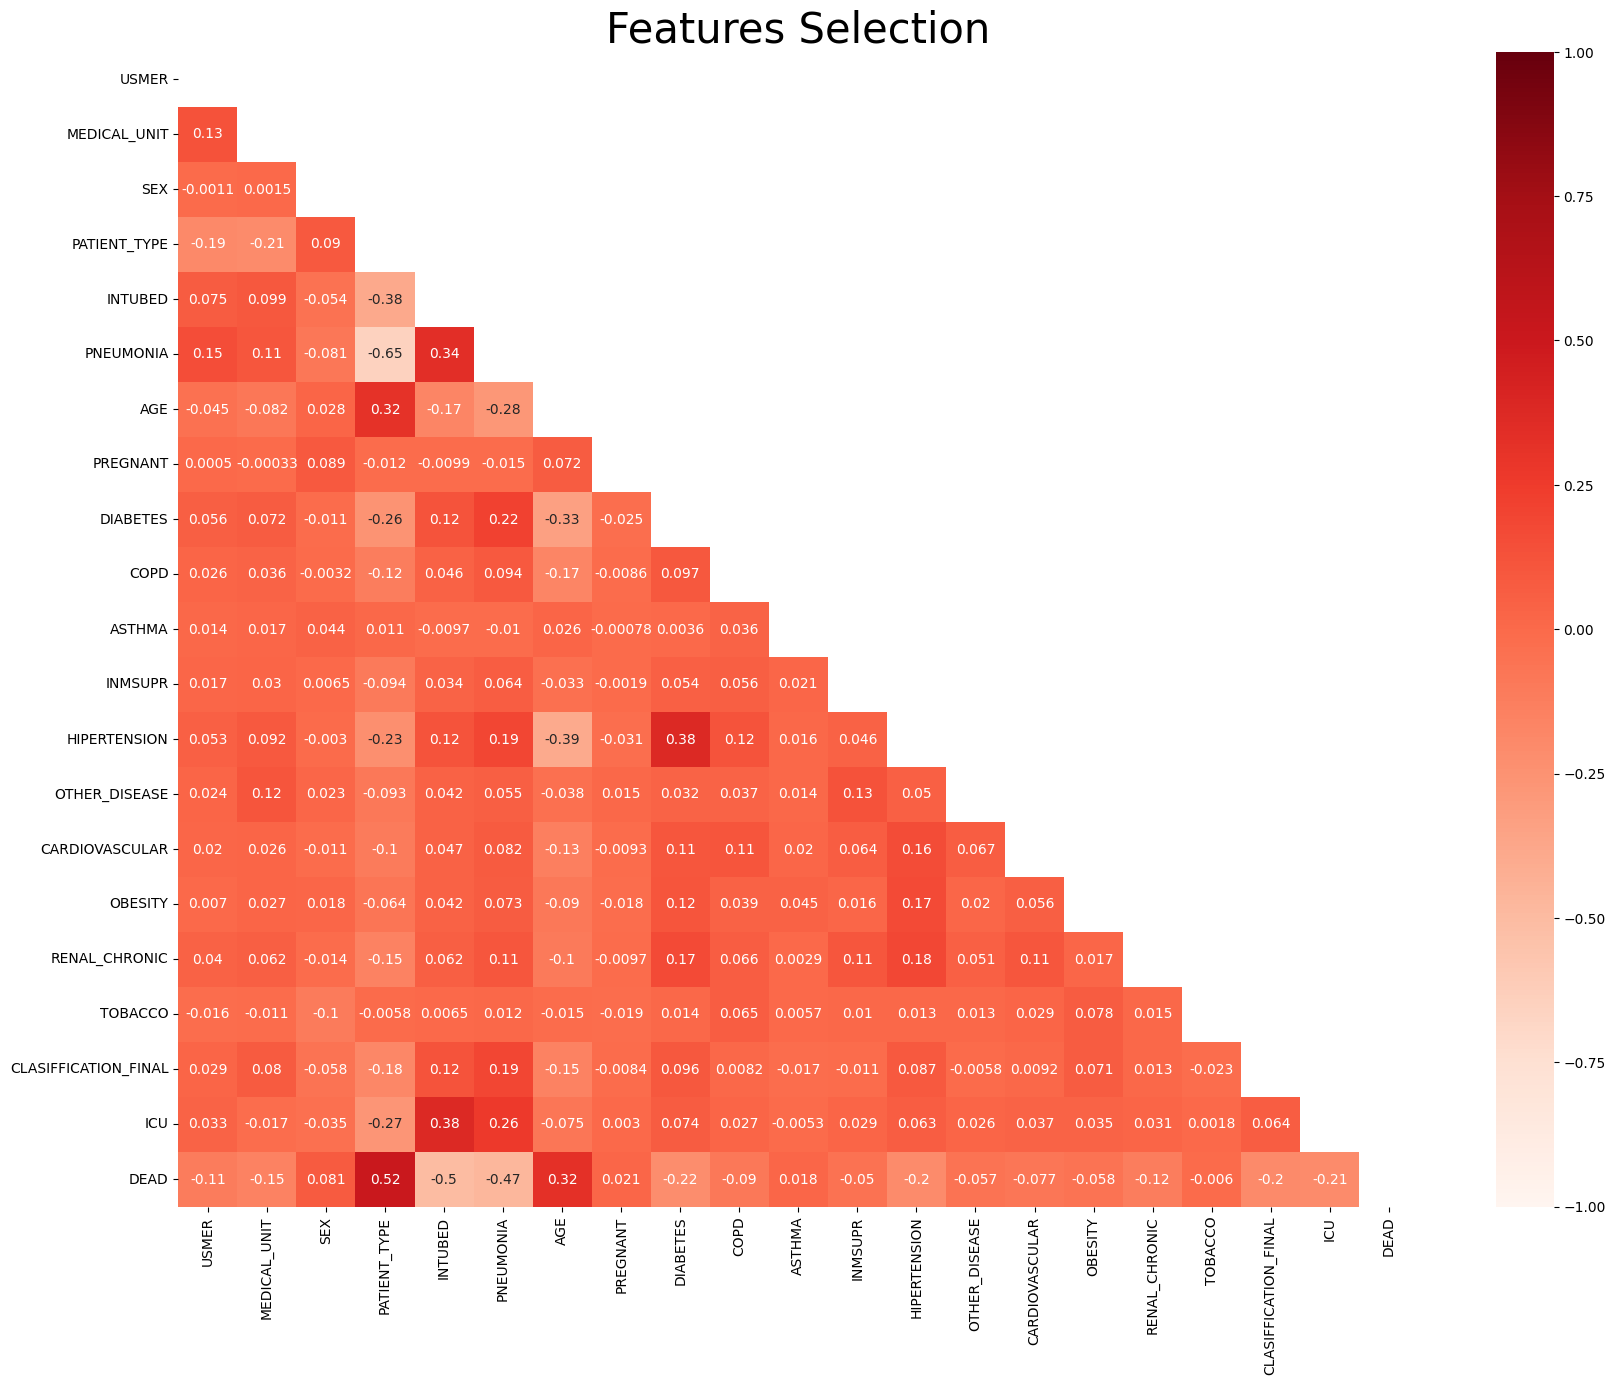

In [134]:
# Create a heatmap to visualize the correlation between features in the 'df' DataFrame, with annotations and a specific color map.
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True, cmap = "Reds", vmin =-1, vmax = 1, mask = mask)
plt.title("Features Selection", color = 'black', fontsize = 30)
plt.show()

In [ ]:
# Remove irrelevant features (columns) specified in the 'unrelevant_features' list from the 'df_model' DataFrame.
unrelevant_features = ["PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]
df_model.drop(columns=unrelevant_features,inplace=True)

DATA SPLITTING

In [137]:
# Split the DataFrame 'df_model' into features (X) and the target variable (Y), where 'DEAD' is the target variable.
X = df_model.drop('DEAD', axis= 1)
Y= df_model['DEAD']

In [138]:
# Split the data into training and testing sets for both features and target variables using a 70-30 split ratio and a fixed random state.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [139]:
# Display the first few rows of the training data for features (x_train).
x_train.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,ICU,Covid_or_Not
304766,2,4,1,2.0,2.0,10.0,2.0,2.0,2.0,7,2.0,2
64146,2,4,1,2.0,2.0,57.0,2.0,2.0,2.0,3,2.0,1
1048272,1,13,2,2.0,2.0,1.0,2.0,2.0,2.0,7,2.0,2
43133,1,4,2,1.0,1.0,71.0,2.0,1.0,2.0,3,2.0,1
257909,2,4,1,2.0,2.0,19.0,2.0,2.0,2.0,7,2.0,2


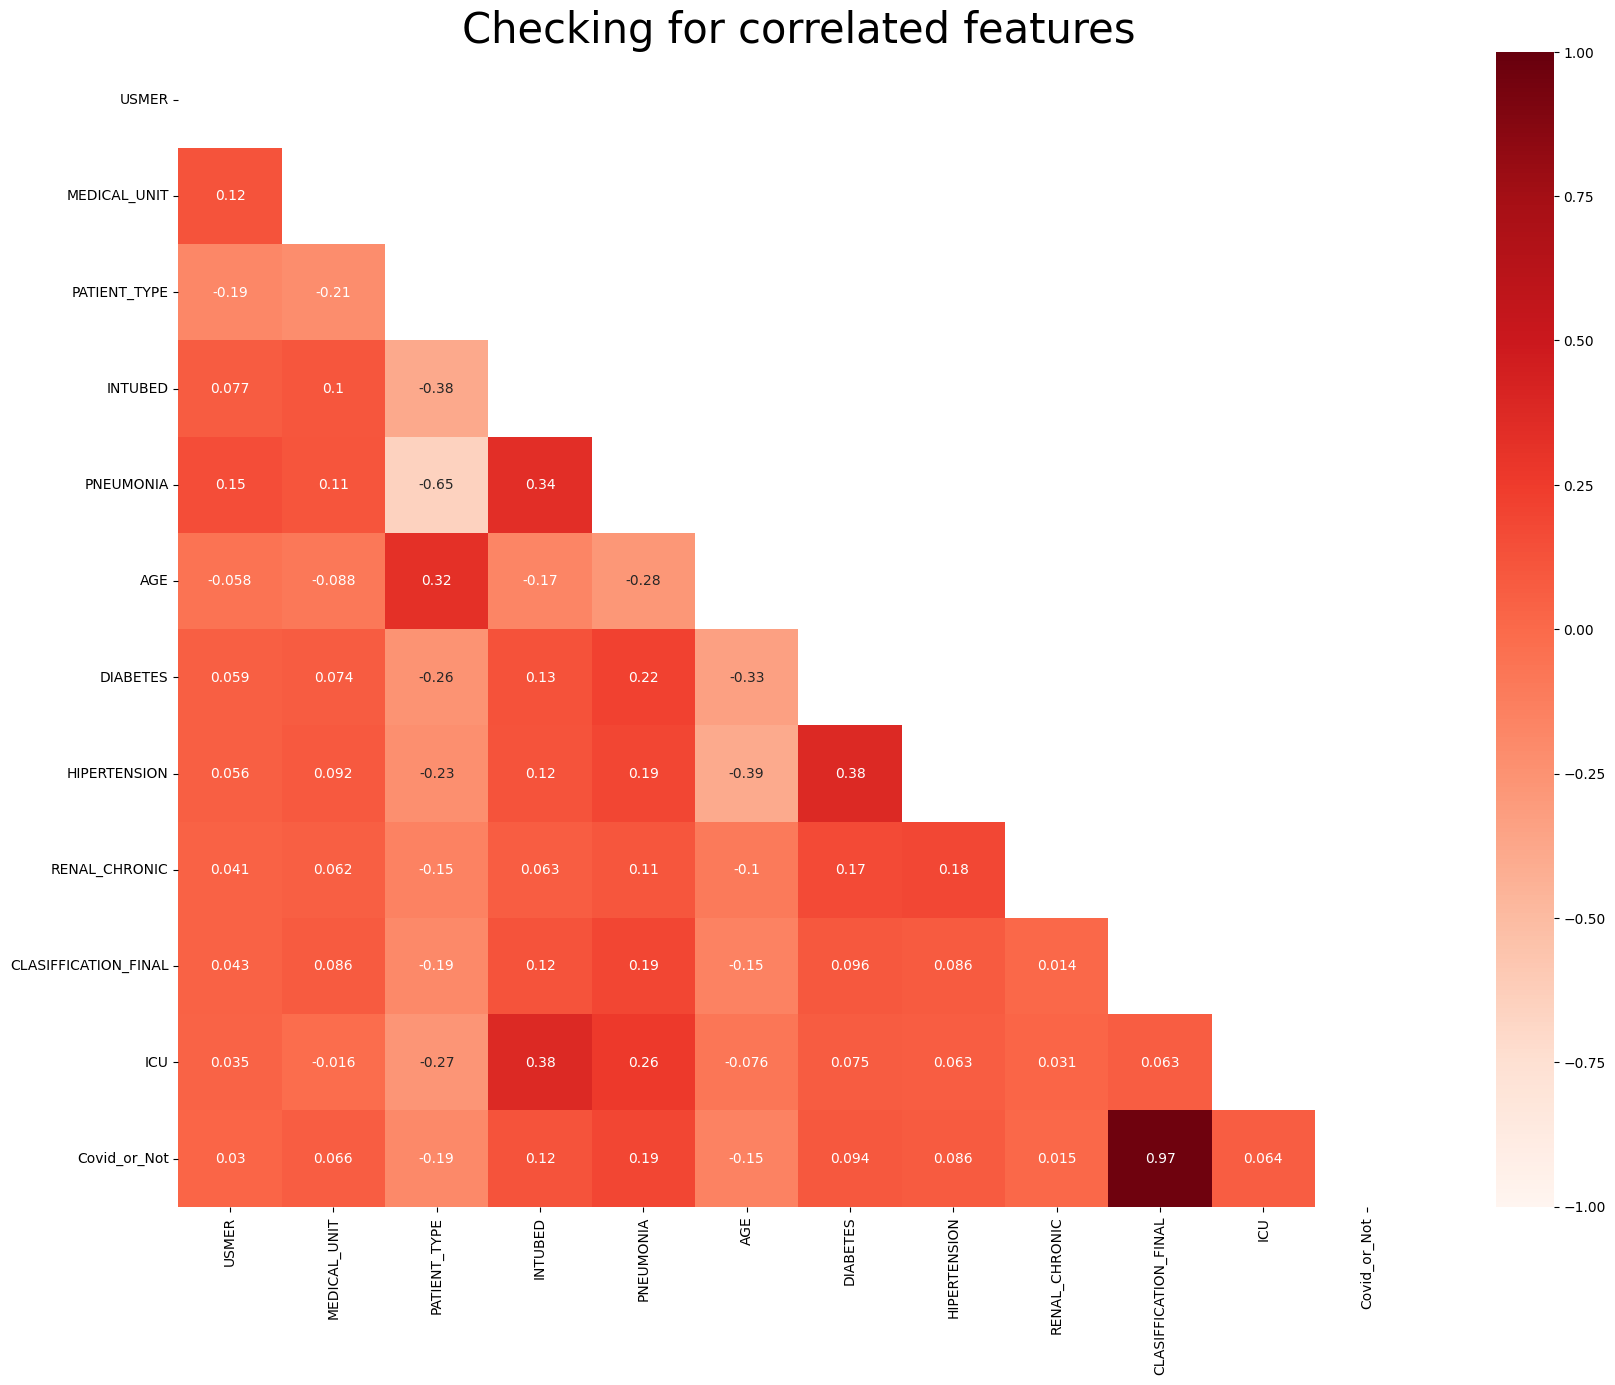

In [141]:
# Create a heatmap to check for correlated features in the training data (x_train), with annotations and a specific color map.
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(x_train.corr()))
sns.heatmap(x_train.corr(), annot = True, cmap = "Reds", vmin = -1, vmax = 1, mask = mask)
plt.title('Checking for correlated features', color = 'black', fontsize = 30)
plt.show()

In [142]:
# Define a function 'correlation' to identify highly correlated features in a dataset based on a specified threshold.
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr   
             

In [143]:
# Print the highly correlated features in the training data (x_train) with a correlation threshold of 0.7.
print(correlation(x_train, 0.7))

{'Covid_or_Not'}


In [144]:
# Remove the 'Covid_or_Not' feature from both the training and testing data (x_train and x_test).
x_train.drop('Covid_or_Not', axis=1, inplace = True)
x_test.drop('Covid_or_Not', axis=1, inplace = True)

Text(0.5, 1.0, 'Before Handling the Imbalance')

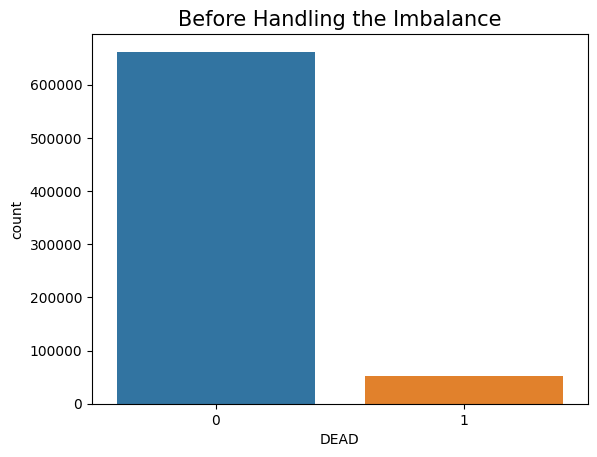

In [145]:
# Create a count plot to visualize the class distribution of the target variable 'y_train' before handling class imbalance.
sns.countplot(x = y_train)
plt.title('Before Handling the Imbalance', color = 'black', fontsize = 15)

Training and Testing

In [146]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("Logistic Regression training accuracy:", lr.score(x_train, y_train),  '\n')
print("Logistic Regression test accuracy:", lr.score(x_test, y_test))

Logistic Regression training accuracy: 0.9488335007868212 

Logistic Regression test accuracy: 0.9495196866355831


In [157]:
# Print the classification report for logistic regression predictions on the test data, with specified class names.
Classes = ['Not Dead', 'Dead']
print("Logistic Regression Classification Report:", "\n", classification_report(y_test, lr.predict(x_test), target_names = Classes))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.96      0.98      0.97    284090
        Dead       0.71      0.50      0.58     21752

    accuracy                           0.95    305842
   macro avg       0.83      0.74      0.78    305842
weighted avg       0.94      0.95      0.95    305842



DECISION TREES

In [158]:
# Train a Decision Tree classifier, calculate and print the train and test accuracy scores.
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
print("Decision Tree Train Accuracy: ", dt.score(x_train, y_train), '\n')
print("Decision Tree Test Accuracy: ", dt.score(x_test, y_test), '\n')

Decision Tree Train Accuracy:  0.9625941137646767 

Decision Tree Test Accuracy:  0.9465769907337775 



In [160]:
# Print the classification report for Decision Tree classifier predictions on the test data, with specified
print("Decision Tree Classification Report:", '\n', classification_report(y_test, dt.predict(x_test), target_names = Classes))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.96      0.98      0.97    284090
        Dead       0.67      0.49      0.57     21752

    accuracy                           0.95    305842
   macro avg       0.82      0.74      0.77    305842
weighted avg       0.94      0.95      0.94    305842



Accuracy is about 95% for decision trees